In [1]:
import os
import sys
print(sys.path)
import subprocess
import shutil
import pandas as pd
import numpy as np
import calendar
import traceback
import json
from pyutils import *
from pdutils import *
from pdpltutils import *
from gputils import *
from iputils import *
import xmltodict
import re

['C:\\Users\\jimbl\\Git\\LELPerformance\\Network_Measurement_Project\\Jupyter', 'C:\\Users\\jimbl\\Git\\PyUtils\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\python38.zip', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\DLLs', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38', '', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\GDAL-3.0.2-py3.8-win-amd64.egg', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\win32', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\win32\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\Pythonwin']


## Initialization

In [2]:
if sys.platform == "linux":
    IP2DIR="/home/jblake1/Downloads/Network_Measurements"
    DATADIR="/home/jblake1/Downloads/Network_Measurements"
    DATADIR2="/home/jblake1/LEL_Network_Project"
else:
    IP2DIR="C:\\Users\\jimbl\\Downloads\\"
    DATADIR="C:\\Users\\jimbl\\Downloads\\"
    # DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\ping-iperf-traceroute-2024-03-22-24"
    # DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\LEL_Measures_03-22-2024_to_04_02_2024"
    # DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\CBRS-5G-Ping-First-Look"
    DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\cbrs5G_2024-04-19-20"
    ALLMEASDIR="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\All_Measures"
    DATADIR3="C:\\Users\\jimbl\\Downloads\\LEL_Network_Project\\LEL_Network_Project"
    # DATADIR3="C:\\Users\\jimbl\\Downloads\\LEL_Network_Project_5G_CBRS"

DIRCHECKLIST=[IP2DIR,ALLMEASDIR,DATADIR2,DATADIR3]
for DIR in DIRCHECKLIST:
    print(f"{DIR} exists") if os.path.isdir(DIR) else print(f"{DIR} does not exist")
# print(f"{IP2DIR} exists") if os.path.isdir(IP2DIR) else print(f"{IP2DIR} does not exist")
# print(f"{ALLMEASDIR} exists") if os.path.isdir(ALLMEASDIR) else print(f"{ALLMEASDIR} does not exist")
# print(f"{DATADIR2} exists") if os.path.isdir(DATADIR2) else print(f"{DATADIR2} does not exist")
# print(f"{DATADIR3} exists") if os.path.isdir(DATADIR3) else print(f"{DATADIR3} does not exist")
IP2LITE="IP2LOCATION-LITE-DB11.CSV"


''' US Boundaries '''
northern=49.382808 # latitude
southern=24.521208
eastern=-66.945392 # longitude
western=-124.736342
pointdict = {
 'northeast':[northern,eastern],
 'northwest':[northern,western],
 'southeast':[southern,eastern],
 'southwest':[southern,western]
}
tdfb = pd.DataFrame.from_dict(pointdict,orient='index',columns=['latitude','longitude'])
tdfb['geometry'] = pt2geom(tdfb,latcol='latitude',lngcol='longitude')
usagb = df2gp(tdfb.copy())
# To plot this map first:
# ax= gp_plotPoints(usagb,mapon=True, alpha=0)

C:\Users\jimbl\Downloads\ exists
C:\Users\jimbl\Box\BoxDesktop\Documents\LEL\Network_Measurements\Network_Study\All_Measures exists
C:\Users\jimbl\Box\BoxDesktop\Documents\LEL\Network_Measurements\Network_Study\cbrs5G_2024-04-19-20 exists
C:\Users\jimbl\Downloads\LEL_Network_Project\LEL_Network_Project exists


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pandas\core\dtypes\cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [3]:
def histplot(dfin,title='Unknown Title',ax=None,filename='tmp.png', 
    figsize=(10,10), xlabel='',ylabel='',tabon=True, saveon=False,
    bins=10, alpha=0.5, fontsize = 30, yticks = True,
    tabfontsize = 30, tabsizex = 1,tabsizey=2,**kwargs):
    font = {'size':fontsize}
    matplotlib.rc('font',**font)
    df = pd.DataFrame(dfin) # in case actually a series
    ''' Parameters '''
    if ax is None:
        ax = plt.figure(figsize=figsize).add_subplot(111)
    ''' Plot '''
    ax = df.plot.hist(bins=bins,alpha=alpha,title=title,figsize=figsize,ax=ax,**kwargs)
    ax.set_xlabel(xlabel)
    if not yticks: ax.set_yticklabels([])
    # print(tabon)
    if tabon:
        tabcolWidths = [0.2]
        tab = table(ax,np.round(df.describe(),2),loc='upper right',colWidths=tabcolWidths)
        tab.set_fontsize(tabfontsize)
        tab.scale(tabsizex,tabsizey)
    if saveon:
        print("Saving %s" % filename)
        savePlot(ax,filename)
    return ax
def makeHist(fdf,title="UNKNOWN", filename="tmp.png"):
    collst = fdf.columns.sort_values()
    col0 = collst[0]
    coln = collst[len(collst)-1]
    # print(col0)
    ax = histplot(fdf[col0],tabon=False, legend=False)
    for col in collst[1:-1]:
        ax = histplot(fdf[col],ax=ax,tabon=False, legend=False, label="PING",by=None)
    ax = histplot(fdf[coln],ax=ax,tabon=False, title=title,saveon=False)
    ax.legend(fontsize="20",loc="right")
    savePlot(ax,filename)
# tabcolWidths = [0.1]
# tab = table(ax,np.round(tdfy.describe(),2),loc='bottom')
# # tab.set_fontsize(30)
# # tab.scale(10,10)

def plotMap(fgp,title="NONE",saveon=False,filename="tmp.png"):
    tablecolumns = ['city_name','region_name','IP']
    tabdf = fgp[tablecolumns]
    plt.rcParams.update({'font.size': 12})
    # plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.3, right=0.5, bottom=0.3, top=0.5)
    # fig.subplots_adjust(hspace=30.0)
    ax= gp_plotPoints(usagb,ax=ax, mapon=True, alpha=0)
    ax = gp_plotPoints(fgp,ax=ax, mapon=True,c='red',title=title)
    fgp = fgp[:-1] # Remove the last line -- belongs to next group
    ax = gp_plotLines(fgp,mapon=True,geocol='LINEGEO',ax=ax,color='green')
    table = ax.table(cellText=tabdf.values, colLabels=tabdf.columns,cellLoc='center', loc='bottom')
    table.scale(1,1)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    if saveon:
        savePlot(ax,filename)

def gp_plotLines(fgp,ax = None,geocol='geometry',ptype='Lines',mapon=False, title=None,
                  figsize=(10,10),ctxprovider=ctxprovider,**kwargs):
    ''' GeoPandas DataFrame with 'geometry' containing LineStrings '''
    ''' Note: color parameter is 'color' '''
    if geocol != 'geometry':
        fgp['geometry'] = fgp[geocol]    
    if mapon:
        fgp = fgp.to_crs(epsg=3857)
    if ax is None:
        ax = plt.figure(figsize=figsize).add_subplot(111)
    ax = fgp.plot(ax=ax,**kwargs)
    gp_setAxesScales(ax,option=False)
    if not title is None:
        gp_setTitle(ax,title)
    if mapon:
        ctx.add_basemap(ax,  source=ctx.providers.OpenStreetMap.Mapnik)
    return ax

### Read Current IP2DIR Clean Directory

In [ ]:
tdfx = readjoin(IP2DIR,IP2LITE.replace(".CSV","CLEAN.CSV"))
dumpdf(tdfx)
idf = tdfx.copy()


## Periodic Tests

In [4]:
''' Config '''
# cnf = {
#     "52.70.44.155":"AWS",
#     "128.2.208.222":"CMU",
#     "eth1":"TMOB",
#     "enx0016083656d3":"CBRS",
#     "enx0050b623c78d":"TMOB"
# }
cnf = {
    "54.91.23.217":"AWS",
    '52.70.44.155':"AWS",
    "18.205.107.100":"AWS",
    "128.2.208.222":"CMU",
    "128.2.211.195":"CMU",
    "eth1":"TMOB",
    "enx76b266ecb9b5":"TMOB-USB",
    "enx0016083656d3":"CBRS",
    "enx0050b623c78d":"CBRS-5G",
    "usb0":"CBRS-5G-USB"
}
# starttime = datetime.datetime(2024, 4, 18, 9)
# endtime = datetime.datetime(2024, 4, 23)
# starttime2 = datetime.datetime(2024, 4, 1, 1)
# endtime2 = datetime.datetime(2024, 4, 9, 11)
plt.rcParams.update({'font.size': 12})

In [5]:
# txtfiles = [os.path.join(DATADIR3,fn) for fn in os.listdir(DATADIR2) if fn.endswith(".csv")] +  \
#            [os.path.join(ALLMEASDIR,fn) for fn in os.listdir(ALLMEASDIR) if fn.endswith(".csv")]
txtfiles = [os.path.join(DATADIR3,fn) for fn in os.listdir(DATADIR3) if fn.endswith(".csv")]
iperffiles = [fn for fn in txtfiles if "iperf-" in fn]
pingfiles =  [fn for fn in txtfiles if "ping-" in fn ]
trrtfiles =  [fn for fn in txtfiles if "traceroute-" in fn ]
print(f"iperfiles={len(iperffiles)} pingfiles={len(pingfiles)} trrtfiles={len(trrtfiles)}")

iperfiles=3457 pingfiles=296709 trrtfiles=296783


### Periodic Pings

In [6]:
''' Get the old data '''
if os.path.isfile("tmp.csv"):
    tdfy = to_ts(readjoin(".","tmp.csv"),fmt="%Y-%m-%d %H:%M:%S.%f")
    tdfa = tdfy.copy()
    # dumpdf(tdfy)
lastts = tdfa.TIMESTAMP.sort_values().iloc[-1]
print(lastts)

2024-08-26 08:22:10.605532


In [7]:
''' Get the timestamp from filename '''
restr = "2024-[0,1][1-9]-[0-3][0-9]-[0-2][0-9]-[0-5][0-9]-[0-5][0-9]-\d{6}"
tdfz = pd.DataFrame(pingfiles,columns = ["FFN"])
tdfz['TIMESTAMP'] = tdfz.FFN.map(lambda fn: datetime.datetime.strptime(re.findall(restr,fn)[0],"%Y-%m-%d-%H-%M-%S-%f"))
tdfz = tdfz[tdfz.TIMESTAMP >= lastts]
newpingfiles = list(tdfz.FFN)
dumpdf(tdfz)

(115823, 2)
                                                      FFN  \
180886  C:\Users\jimbl\Downloads\LEL_Network_Project\L...   
180887  C:\Users\jimbl\Downloads\LEL_Network_Project\L...   
180888  C:\Users\jimbl\Downloads\LEL_Network_Project\L...   
180889  C:\Users\jimbl\Downloads\LEL_Network_Project\L...   
180890  C:\Users\jimbl\Downloads\LEL_Network_Project\L...   

                        TIMESTAMP  
180886 2024-08-26 08:22:10.605532  
180887 2024-08-26 08:22:20.336063  
180888 2024-08-26 08:22:29.936805  
180889 2024-08-26 08:22:39.656960  
180890 2024-08-26 08:22:56.227303  
FFN                  object
TIMESTAMP    datetime64[ns]
dtype: object


In [ ]:
def readPingFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['SDEST'] = fdf.DEST.map(lambda xx: cnf[xx])
    fdf['SACCESS'] = fdf.IFC.map(lambda xx: cnf[xx])
    # dumpdf(fdf)
    return fdf.iloc[1:]

# print(pingfiles)
tdfx = readPingFile(pingfiles[1])
pingfiles.sort()

In [ ]:
tdfy = pd.DataFrame()
print(f"Start reading files at {humandatenow()} ")
for fn in pingfiles:
    tdfx = readPingFile(fn)
    tdfy = pd.concat([tdfy,tdfx])
print(f"Done reading files at {humandatenow()} ")
tdfa = tdfy.copy()
writejoin(tdfa.set_index("TIMESTAMP"),".","tmp-5g-cbrs.csv")

In [8]:
# Alternate method of reading in files
filecontent = []
print(f"Start reading {len(newpingfiles)} files at {humandatenow()} ")

for count,filename in enumerate(newpingfiles[:]):
    with open(filename, "r") as infile:
        if (count % 10000 == 0): print(f"Read {count} files at {humandatenow()}")
        filecontent = filecontent + infile.readlines()
print(f"Done reading files at {humandatenow()} ")

filesplit =  [line.replace("\n","").split(",") for line in filecontent]
tdfx = pd.DataFrame(filesplit, columns = ["TIME","TIMESTAMP","HDATE","TEST","DEST","IFC","PINGINTERVAL"])
tdfx = to_ts(tdfx,format = '%Y-%m-%d %H:%M:%S.%f')
tdfx = tdfx[tdfx.TIME != "TIME"] # Get rid of header rows
tdfx['SDEST'] = tdfx.DEST.map(lambda xx: cnf[xx])
tdfx['SACCESS'] = tdfx.IFC.map(lambda xx: cnf[xx])
dumpdf(tdfx,head = 20)

Start reading 115823 files at 2024-09-09-08-58-10-258821 
Read 0 files at 2024-09-09-08-58-10-261820
Read 10000 files at 2024-09-09-08-58-39-408805
Read 20000 files at 2024-09-09-08-59-44-260281
Read 30000 files at 2024-09-09-09-01-15-681237
Read 40000 files at 2024-09-09-09-03-22-094414
Read 50000 files at 2024-09-09-09-05-57-881082
Read 60000 files at 2024-09-09-09-09-08-885253
Read 70000 files at 2024-09-09-09-12-44-378989
Read 80000 files at 2024-09-09-09-17-05-776339
Read 90000 files at 2024-09-09-09-21-33-005133
Read 100000 files at 2024-09-09-09-26-27-432566
Read 110000 files at 2024-09-09-09-31-55-022786
Done reading files at 2024-09-09-09-35-12-481598 
(1158074, 9)
    TIME                  TIMESTAMP                       HDATE  TEST  \
1   39.0 2024-08-26 08:22:10.605532  2024-08-26-08-22-10-605532  ping   
2   34.0 2024-08-26 08:22:10.605532  2024-08-26-08-22-10-605532  ping   
3   33.0 2024-08-26 08:22:10.605532  2024-08-26-08-22-10-605532  ping   
4   38.0 2024-08-26 08:22

In [9]:
tdfy = pd.concat([tdfa,tdfx])
dumpdf(tdfy)
writejoin(tdfy.set_index("TIMESTAMP"),".","tmp.csv")

(2966622, 9)
                   TIMESTAMP  TIME                       HDATE  TEST  \
0 2024-07-29 12:34:16.756815   2.0  2024-07-29-12-34-16-756815  ping   
1 2024-07-29 12:34:16.756815  50.0  2024-07-29-12-34-16-756815  ping   
2 2024-07-29 12:34:16.756815  36.0  2024-07-29-12-34-16-756815  ping   
3 2024-07-29 12:34:16.756815  38.0  2024-07-29-12-34-16-756815  ping   
4 2024-07-29 12:34:16.756815  41.0  2024-07-29-12-34-16-756815  ping   

            DEST              IFC PINGINTERVAL SDEST   SACCESS  
0  128.2.211.195  enx76b266ecb9b5            1   CMU  TMOB-USB  
1  128.2.211.195  enx76b266ecb9b5            1   CMU  TMOB-USB  
2  128.2.211.195  enx76b266ecb9b5            1   CMU  TMOB-USB  
3  128.2.211.195  enx76b266ecb9b5            1   CMU  TMOB-USB  
4  128.2.211.195  enx76b266ecb9b5            1   CMU  TMOB-USB  
TIMESTAMP       datetime64[ns]
TIME                    object
HDATE                   object
TEST                    object
DEST                    object
IFC      

In [11]:
''' Add date/time oriented columns '''
tdfy = to_ts(readjoin(".","tmp.csv"),fmt="%Y-%m-%d %H:%M:%S.%f")
dowdict = {0:'Mo',1:'Tu',2:'We',3:'Th',4:'Fr',5:'Sa',6:'Su'}
tdfy['DOW'] = tdfy.TIMESTAMP.dt.weekday
tdfy['SDOW'] = tdfy.DOW.map(lambda dow: dowdict[dow])
tdfy['DAYFLOOR'] = tdfy['TIMESTAMP'].dt.floor('d')
tdfy['DAYCEIL'] = tdfy['TIMESTAMP'].dt.ceil('d')
tdfy['DAYSTR'] = tdfy.TIMESTAMP.dt.strftime('%Y-%m-%d')
tdfa = tdfy.copy()
dumpdf(tdfy)

(2966622, 14)
                   TIMESTAMP  TIME                       HDATE  TEST  \
0 2024-07-29 12:34:16.756815   2.0  2024-07-29-12-34-16-756815  ping   
1 2024-07-29 12:34:16.756815  50.0  2024-07-29-12-34-16-756815  ping   
2 2024-07-29 12:34:16.756815  36.0  2024-07-29-12-34-16-756815  ping   
3 2024-07-29 12:34:16.756815  38.0  2024-07-29-12-34-16-756815  ping   
4 2024-07-29 12:34:16.756815  41.0  2024-07-29-12-34-16-756815  ping   

            DEST              IFC  PINGINTERVAL SDEST   SACCESS  DOW SDOW  \
0  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
1  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
2  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
3  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
4  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   

    DAYFLOOR    DAYCEIL      DAYSTR  
0 2024-07-29 2024-07-30  2024-07-29  
1 2024-07-29 2

In [ ]:
# starttime = datetime.datetime(2024, 8, 7, 23, 0)
# endtime = datetime.datetime(2024, 8, 8, 2, 0)
# tdfy = tdfa[((tdfa.TIMESTAMP > starttime) & (tdfa.TIMESTAMP < endtime))].sort_values('TIMESTAMP').copy()
# starttime2 = datetime.datetime(2024, 3, 24, 0)
# endtime2 = datetime.datetime(2024, 4, 3, 11)
# def checkSACCESS(xx):
#     if xx.TIMESTAMP <= starttime and xx.IFC == "enx0050b623c78d":
#         xx.SACCESS = 'TMOB'
#     return xx
# # tdfy = tdfa[((tdfa.TIMESTAMP > starttime) & (tdfa.TIMESTAMP < endtime)) |\
# #             ((tdfa.TIMESTAMP > starttime2) & (tdfa.TIMESTAMP < endtime2))].sort_values('TIMESTAMP').copy()

# tdfy = tdfy.apply(checkSACCESS, axis=1)
# dumpdf(tdfy[tdfy.IFC ==  "enx0050b623c78d"].sort_values('TIMESTAMP'))
# tdfy = tdfy[((tdfy.SACCESS == "CBRS-5G") | (tdfy.SACCESS == "TMOB")) & (tdfy.SDEST == "AWS")]
# # title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"

In [12]:
''' Make a temporary df for the days included in the data '''
tdfb = tdfy[['DAYFLOOR','DAYCEIL','DAYSTR','SDOW']].drop_duplicates().copy()
dumpdf(tdfb)

(40, 4)
         DAYFLOOR    DAYCEIL      DAYSTR SDOW
0      2024-07-29 2024-07-30  2024-07-29   Mo
18079  2024-07-30 2024-07-31  2024-07-30   Tu
76801  2024-07-31 2024-08-01  2024-07-31   We
152008 2024-08-01 2024-08-02  2024-08-01   Th
193559 2024-08-05 2024-08-06  2024-08-05   Mo
DAYFLOOR    datetime64[ns]
DAYCEIL     datetime64[ns]
DAYSTR              object
SDOW                object
dtype: object


In [17]:
''' Trim impossibly low pingtimes '''
tdfy = tdfy[tdfy.TIME > 10]
dumpdf(tdfy)

(2936491, 14)
                   TIMESTAMP  TIME                       HDATE  TEST  \
1 2024-07-29 12:34:16.756815  50.0  2024-07-29-12-34-16-756815  ping   
2 2024-07-29 12:34:16.756815  36.0  2024-07-29-12-34-16-756815  ping   
3 2024-07-29 12:34:16.756815  38.0  2024-07-29-12-34-16-756815  ping   
4 2024-07-29 12:34:16.756815  41.0  2024-07-29-12-34-16-756815  ping   
5 2024-07-29 12:34:16.756815  36.0  2024-07-29-12-34-16-756815  ping   

            DEST              IFC  PINGINTERVAL SDEST   SACCESS  DOW SDOW  \
1  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
2  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
3  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
4  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   
5  128.2.211.195  enx76b266ecb9b5             1   CMU  TMOB-USB    0   Mo   

    DAYFLOOR    DAYCEIL      DAYSTR  
1 2024-07-29 2024-07-30  2024-07-29  
2 2024-07-29 2

['CMU', 'AWS'] ['TMOB-USB']
(8, 3)
  METRIC  via TMOB-USB\nto CMU  via TMOB-USB\nto AWS
0  count            1468782.00            1467709.00
1   mean                 46.35                 51.60
2    std                 11.82                 11.23
3    min                 12.00                 11.00
4    25%                 38.00                 43.00
METRIC                   object
via TMOB-USB\nto CMU    float64
via TMOB-USB\nto AWS    float64
dtype: object


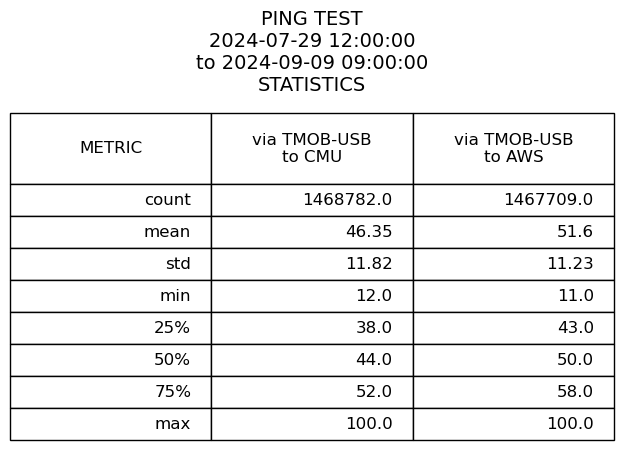

In [19]:
''' Stats Table '''
def makeTable(fdf,title="UNKNOWN",filename="tmp.png"):
    # print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    print(sdestlst,sacclst)
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst[:]:           
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            fser = np.round(fdf1.TIME.describe(),2)
            fser.name = f"via {SACCESS}\nto {SDEST}"
            # dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    # dumpdf(describe)
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    cellDict = table.get_celld() # Set header size
    tablewidth = len(sdestlst) * len(sacclst) + 1
    for ii in range(0,tablewidth):
        cellDict[(0,ii)].set_height(.1)
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title,fontsize=14)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
tdfz = tdfy.copy()[['TIME','TIMESTAMP','SDEST','SACCESS']]
makeTable(tdfz,title=title + "\nSTATISTICS",filename="PING TEST STATS.png")

1000 11.0 100.0
35


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\3171244014.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()


PING TEST
2024-07-29 12:00:00
to 2024-09-09 09:00:00
ROLLING LINE (WINDOW=1000)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\3171244014.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()


PING TEST
2024-07-29 12:00:00
to 2024-09-09 09:00:00
ROLLING LINE (WINDOW=1000)


<Axes: title={'center': 'PING TEST\n2024-07-29 12:00:00\nto 2024-09-09 09:00:00\nROLLING LINE (WINDOW=1000)'}, xlabel='TIMESTAMP', ylabel='Ping Time (ms)'>

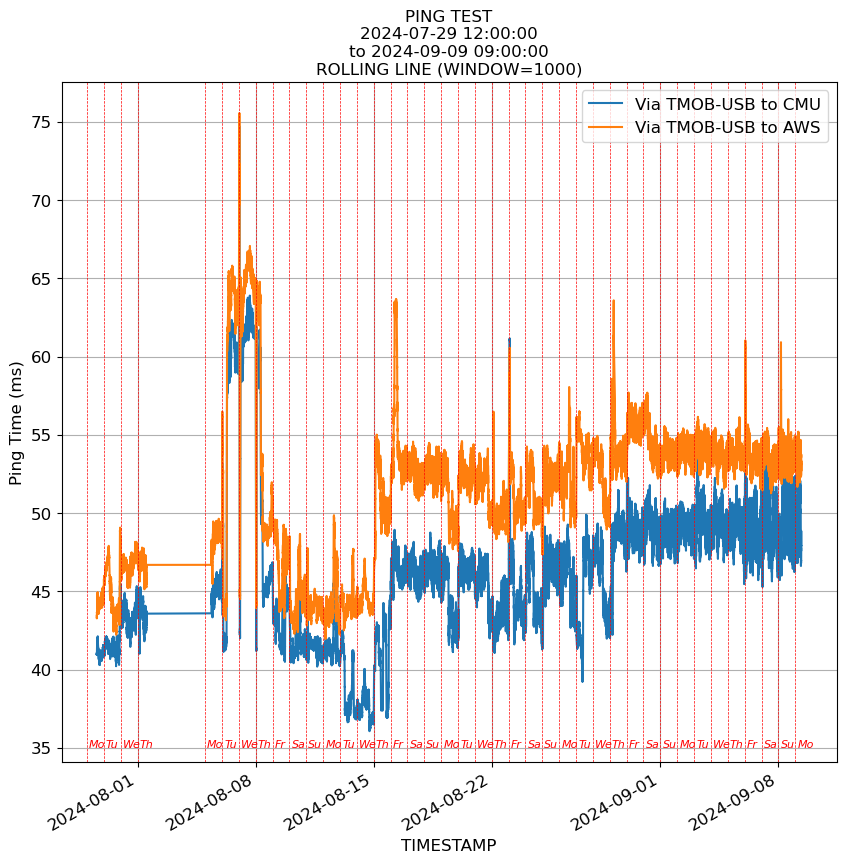

In [20]:
''' Line Plot of Raw Pings and Rolling Average Ping Time '''
title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
colname='ROLLINGTIME'
# WINDOW=int(np.round(60/7*4,0))
WINDOW=1000
print(WINDOW,tdfy.TIME.min(),tdfy.TIME.max())
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    pltping = 35
    print(pltping)
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            if col == 'ROLLINGTIME':
                fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    color = "red"
    tdfb.apply(lambda row: ax.axvline(row.DAYFLOOR,color=color, linestyle='dashed',linewidth=0.5),axis=1)
    tdfb.apply(lambda row: ax.text(row.DAYFLOOR + pd.Timedelta(hours=3),pltping, row.SDOW, style ='italic', fontsize = 8, color = color),axis=1)
    ax.legend(labels=legendlabellst,loc=1)
    ax.set_title(title,fontsize=12)
    ax.set_ylabel("Ping Time (ms)")
    savePlot(ax,filename)
    return ax
tdfz = tdfy.copy()

# makeLine(tdfz,"TIME",filename="PING LINE TEST.png",title=title + "\nLINE")
makeLine(tdfz,"ROLLINGTIME",filename="ROLLING PING LINE TEST.png",title=title + f"\nROLLING LINE (WINDOW={WINDOW})")

In [32]:
import matplotlib.colors as mcolors
print(type(mcolors.BASE_COLORS),mcolors.BASE_COLORS)

<class 'dict'> {'b': (0, 0, 1), 'g': (0, 0.5, 0), 'r': (1, 0, 0), 'c': (0, 0.75, 0.75), 'm': (0.75, 0, 0.75), 'y': (0.75, 0.75, 0), 'k': (0, 0, 0), 'w': (1, 1, 1)}


2024-07-29 00:00:00 2024-07-30 00:00:00
fdf.shape=(17898, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-29 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-29 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-07-30 00:00:00 2024-07-31 00:00:00
fdf.shape=(58296, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-30 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-30 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-07-31 00:00:00 2024-08-01 00:00:00
fdf.shape=(74692, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-31 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-07-31 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-01 00:00:00 2024-08-02 00:00:00
fdf.shape=(41295, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-01 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-01 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-05 00:00:00 2024-08-06 00:00:00
fdf.shape=(44952, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-05 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-05 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-06 00:00:00 2024-08-07 00:00:00
fdf.shape=(73588, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-06 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-06 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-07 00:00:00 2024-08-08 00:00:00
fdf.shape=(73227, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-07 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-07 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-08 00:00:00 2024-08-09 00:00:00
fdf.shape=(73435, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-08 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-08 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-09 00:00:00 2024-08-10 00:00:00
fdf.shape=(73600, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-09 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-09 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-10 00:00:00 2024-08-11 00:00:00
fdf.shape=(78346, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-10 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-10 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-11 00:00:00 2024-08-12 00:00:00
fdf.shape=(79591, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-11 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-11 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-12 00:00:00 2024-08-13 00:00:00
fdf.shape=(75386, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-12 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-12 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-13 00:00:00 2024-08-14 00:00:00
fdf.shape=(76713, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-13 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-13 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-14 00:00:00 2024-08-15 00:00:00
fdf.shape=(76362, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-14 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-14 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-15 00:00:00 2024-08-16 00:00:00
fdf.shape=(75679, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-15 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-15 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-16 00:00:00 2024-08-17 00:00:00
fdf.shape=(74886, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-16 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-16 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-17 00:00:00 2024-08-18 00:00:00
fdf.shape=(78472, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-17 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-17 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-18 00:00:00 2024-08-19 00:00:00
fdf.shape=(79939, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-18 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-18 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-19 00:00:00 2024-08-20 00:00:00
fdf.shape=(77357, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-19 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-19 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-20 00:00:00 2024-08-21 00:00:00
fdf.shape=(76525, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-20 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-20 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-21 00:00:00 2024-08-22 00:00:00
fdf.shape=(75303, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-21 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-21 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-22 00:00:00 2024-08-23 00:00:00
fdf.shape=(74505, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-22 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-22 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-23 00:00:00 2024-08-24 00:00:00
fdf.shape=(75435, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-23 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-23 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-24 00:00:00 2024-08-25 00:00:00
fdf.shape=(76964, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-24 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-24 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-25 00:00:00 2024-08-26 00:00:00
fdf.shape=(78017, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-25 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-25 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-26 00:00:00 2024-08-27 00:00:00
fdf.shape=(73320, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-26 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-26 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-27 00:00:00 2024-08-28 00:00:00
fdf.shape=(78314, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-27 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS
PING TEST
2024-08-27 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


2024-08-28 00:00:00 2024-08-29 00:00:00
fdf.shape=(79075, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-28 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-28 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-29 00:00:00 2024-08-30 00:00:00
fdf.shape=(78680, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-29 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-29 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-30 00:00:00 2024-08-31 00:00:00
fdf.shape=(82551, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-30 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-30 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-08-31 00:00:00 2024-09-01 00:00:00
fdf.shape=(84964, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-31 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-08-31 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-01 00:00:00 2024-09-02 00:00:00
fdf.shape=(85595, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-01 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-01 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-02 00:00:00 2024-09-03 00:00:00
fdf.shape=(85772, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-02 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-02 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-03 00:00:00 2024-09-04 00:00:00
fdf.shape=(82434, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-03 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-03 DOW=Tu
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-04 00:00:00 2024-09-05 00:00:00
fdf.shape=(82099, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-04 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-04 DOW=We
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-05 00:00:00 2024-09-06 00:00:00
fdf.shape=(81323, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-05 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-05 DOW=Th
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-06 00:00:00 2024-09-07 00:00:00
fdf.shape=(81954, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-06 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-06 DOW=Fr
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-07 00:00:00 2024-09-08 00:00:00
fdf.shape=(84334, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-07 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-07 DOW=Sa
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-08 00:00:00 2024-09-09 00:00:00
fdf.shape=(85390, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-08 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-08 DOW=Su
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU
2024-09-09 00:00:00 2024-09-10 00:00:00
fdf.shape=(30223, 14)


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-09 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to AWS


C:\Users\jimbl\AppData\Local\Temp\ipykernel_26684\913631835.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]


PING TEST
2024-09-09 DOW=Mo
ROLLING LINE (WINDOW=1000)
TMOB-USB to CMU


0          None
18079      None
76801      None
152008     None
193559     None
238903     None
313200     None
387400     None
461472     None
536762     None
615769     None
695812     None
772027     None
848992     None
925712     None
1001848    None
1077922    None
1157459    None
1238325    None
1316660    None
1394194    None
1470720    None
1546570    None
1623356    None
1701530    None
1780700    None
1855415    None
1934736    None
2014819    None
2094857    None
2177991    None
2263272    None
2349112    None
2435136    None
2518362    None
2601211    None
2683401    None
2765949    None
2850573    None
2936282    None
dtype: object

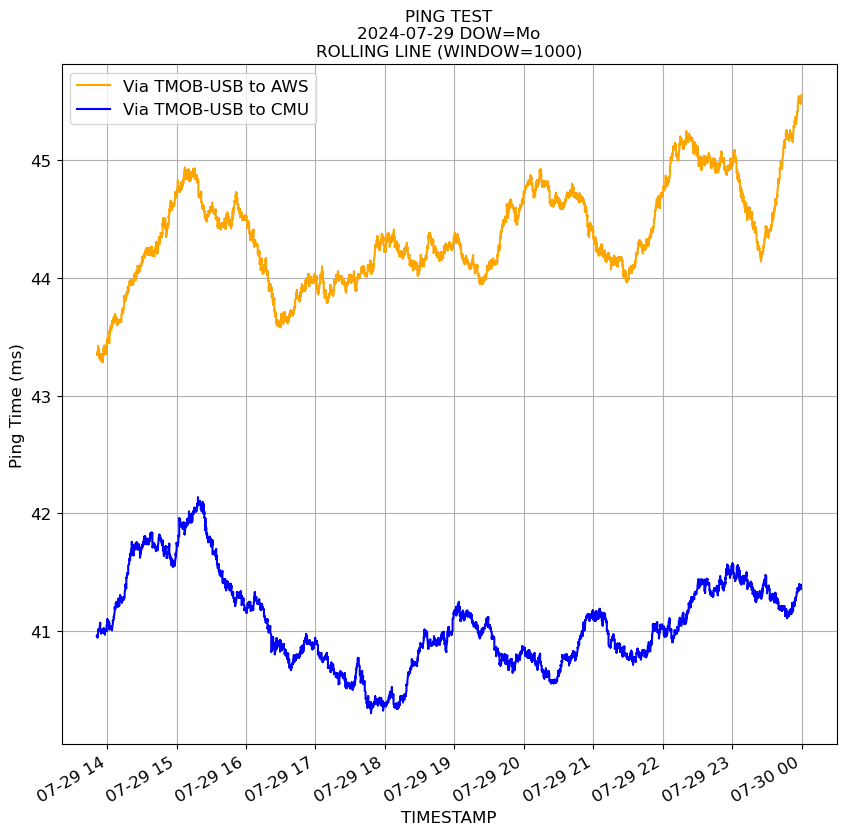

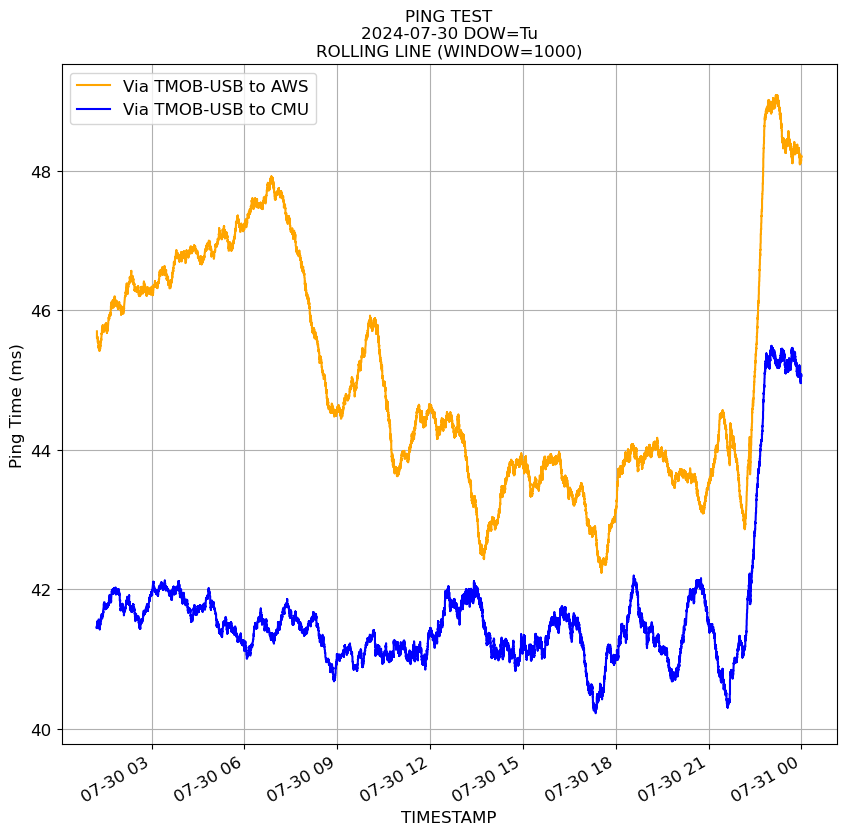

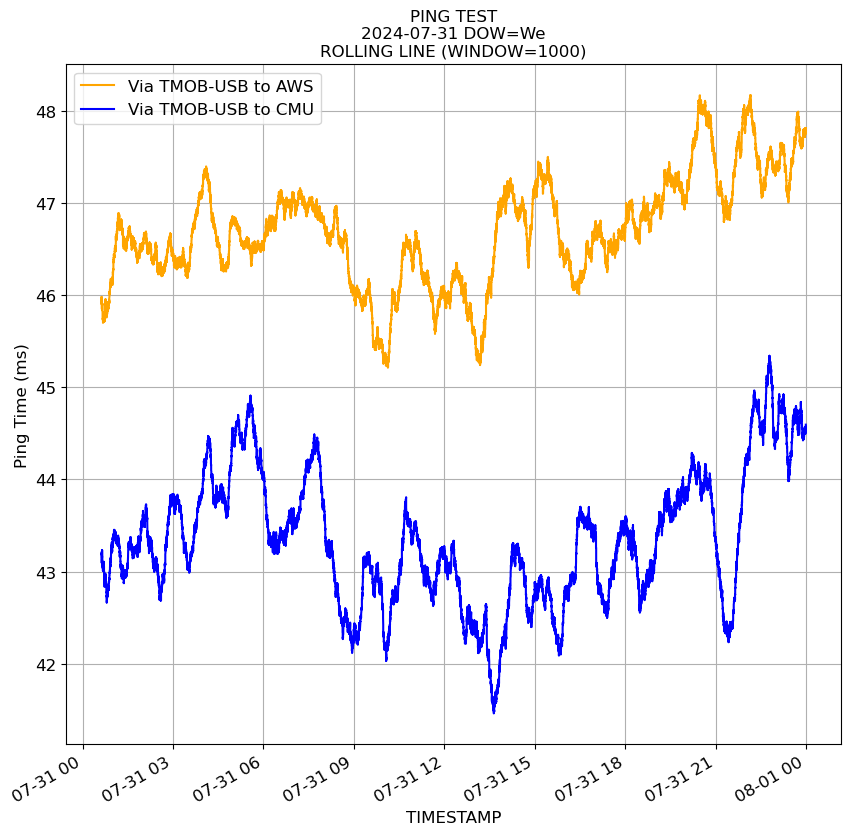

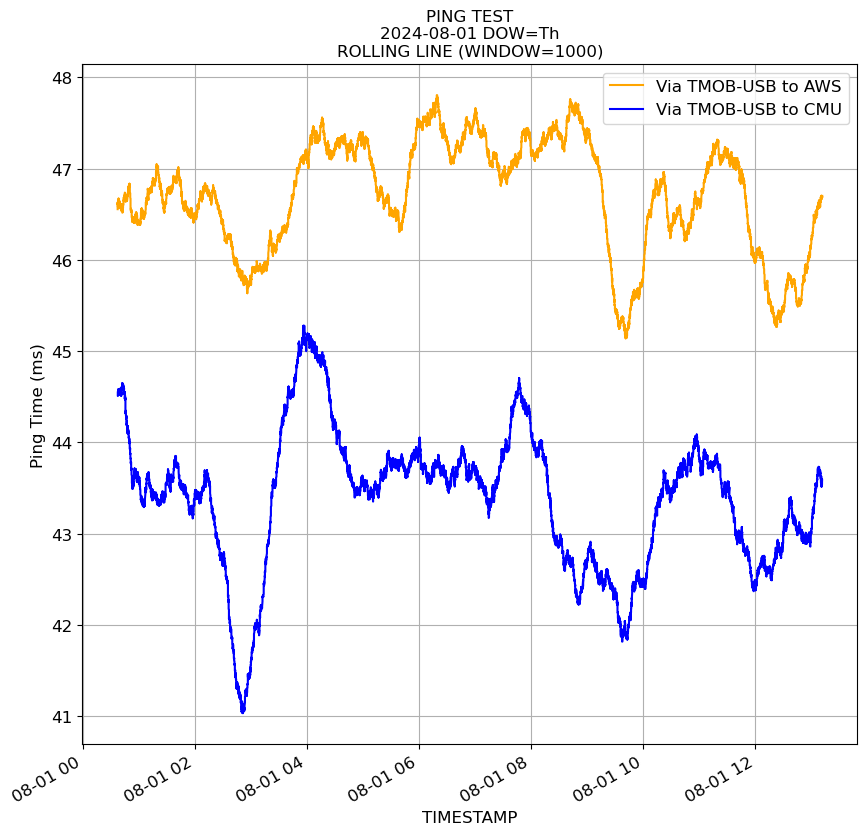

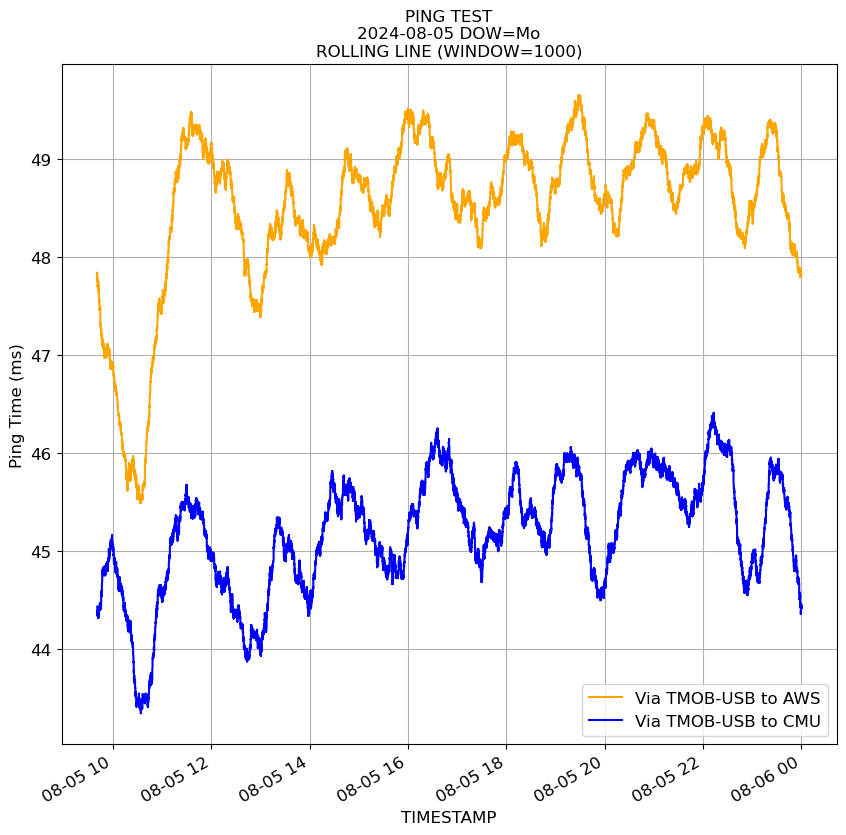

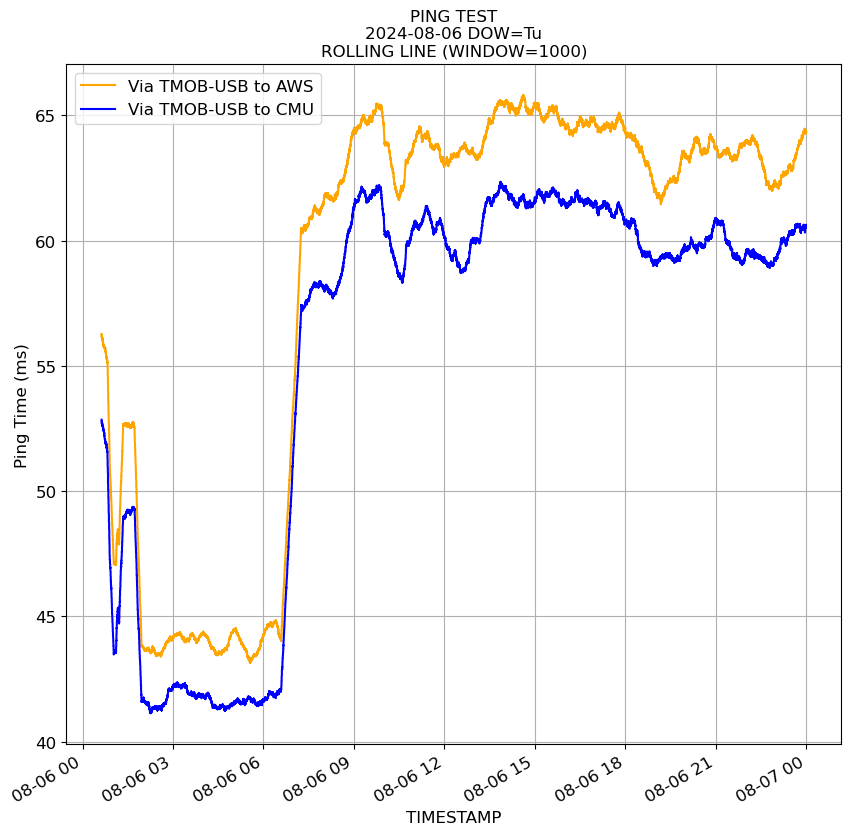

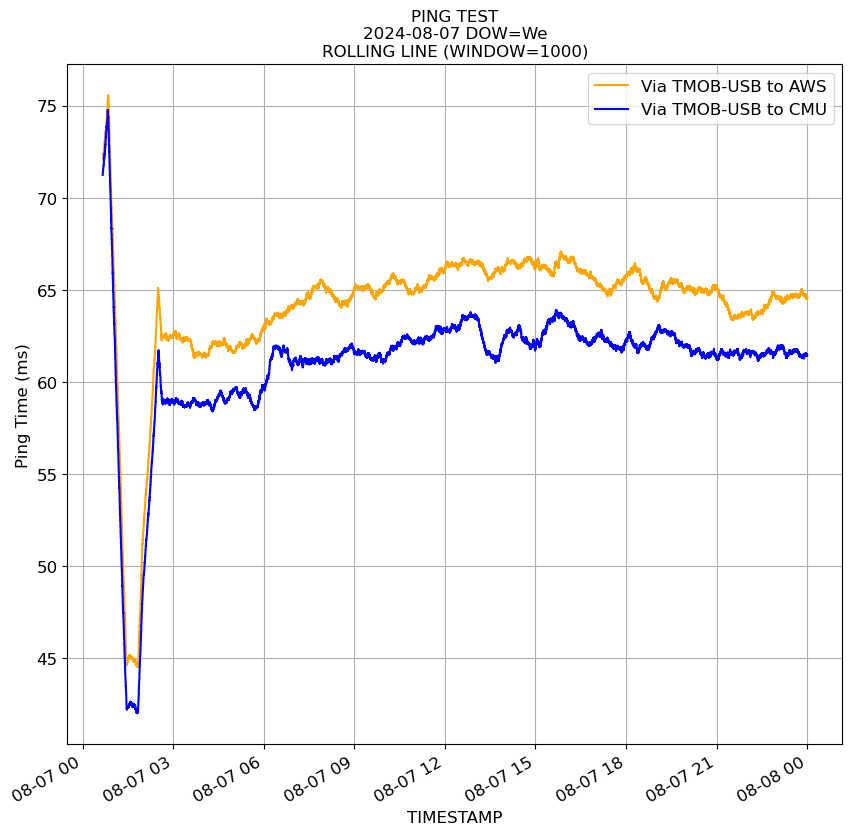

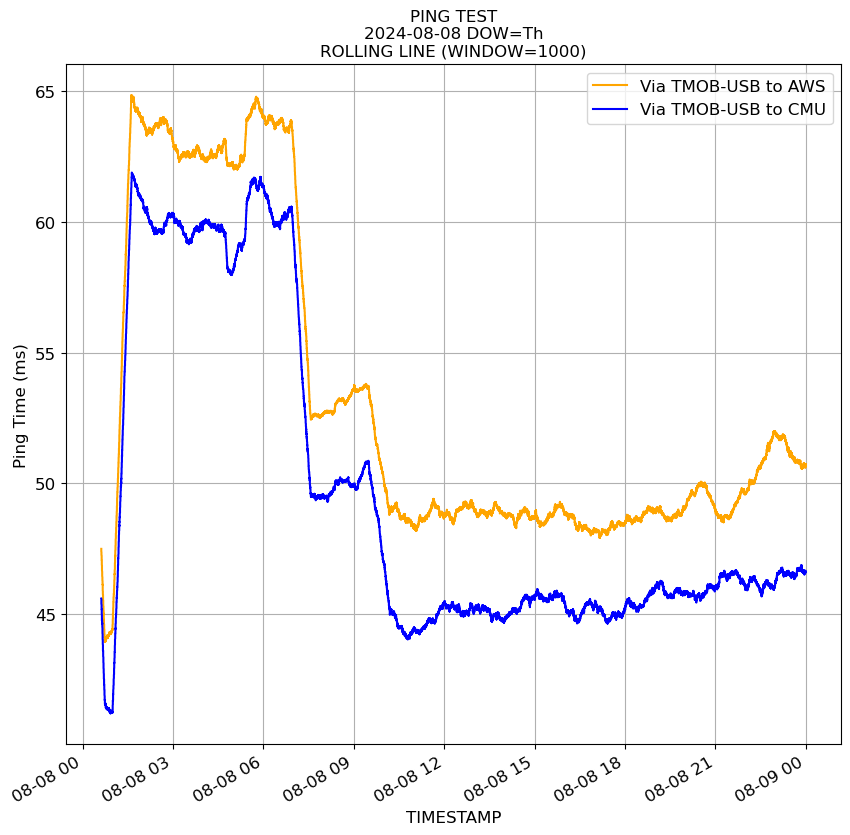

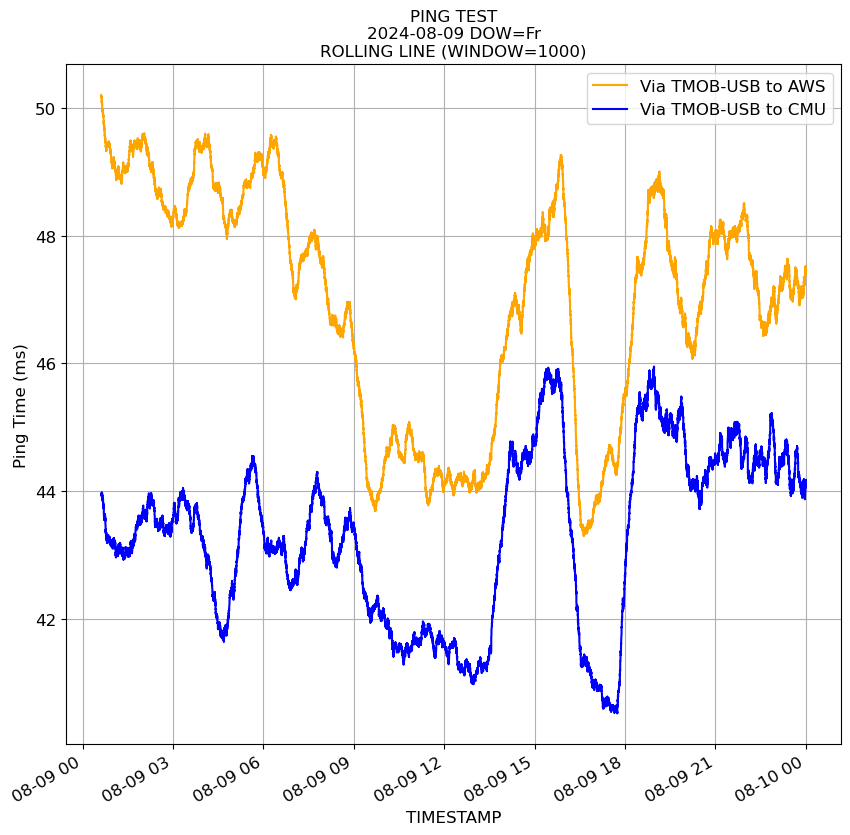

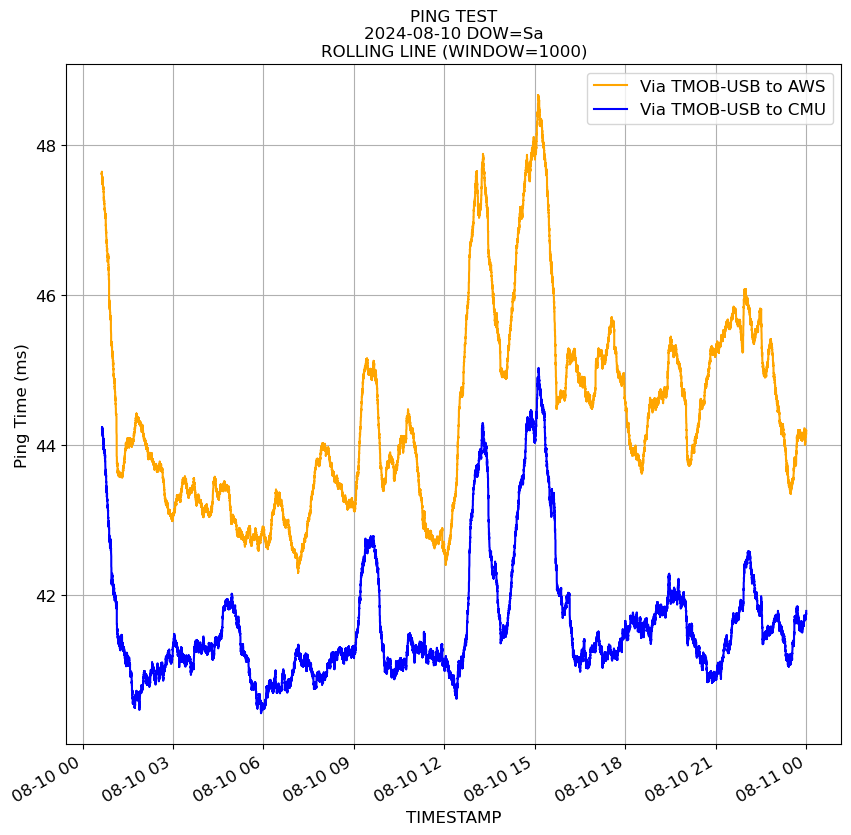

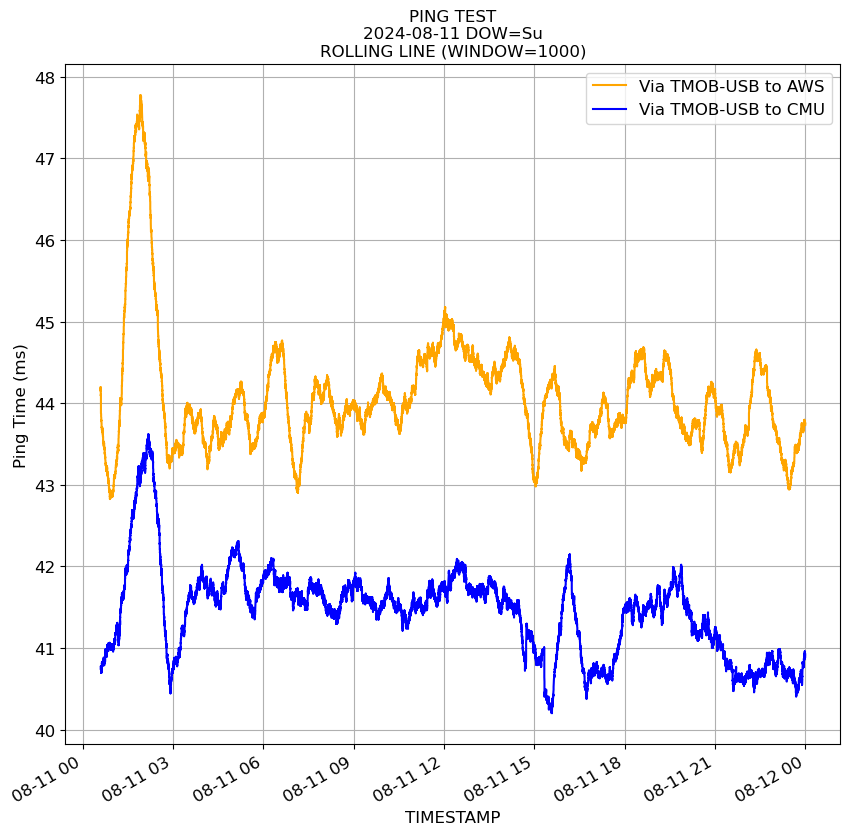

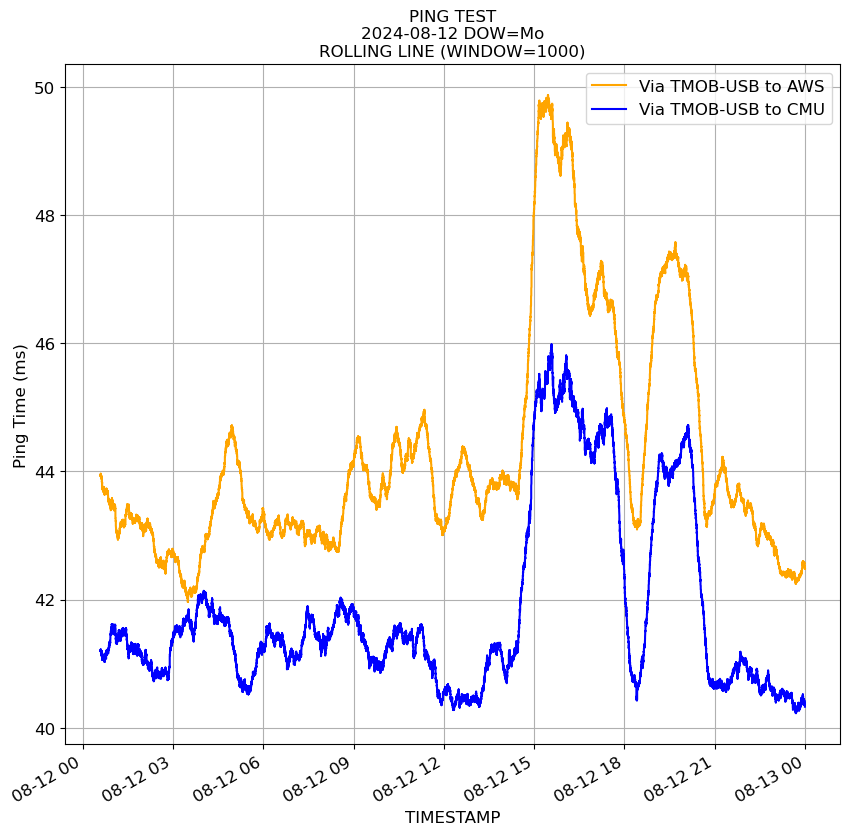

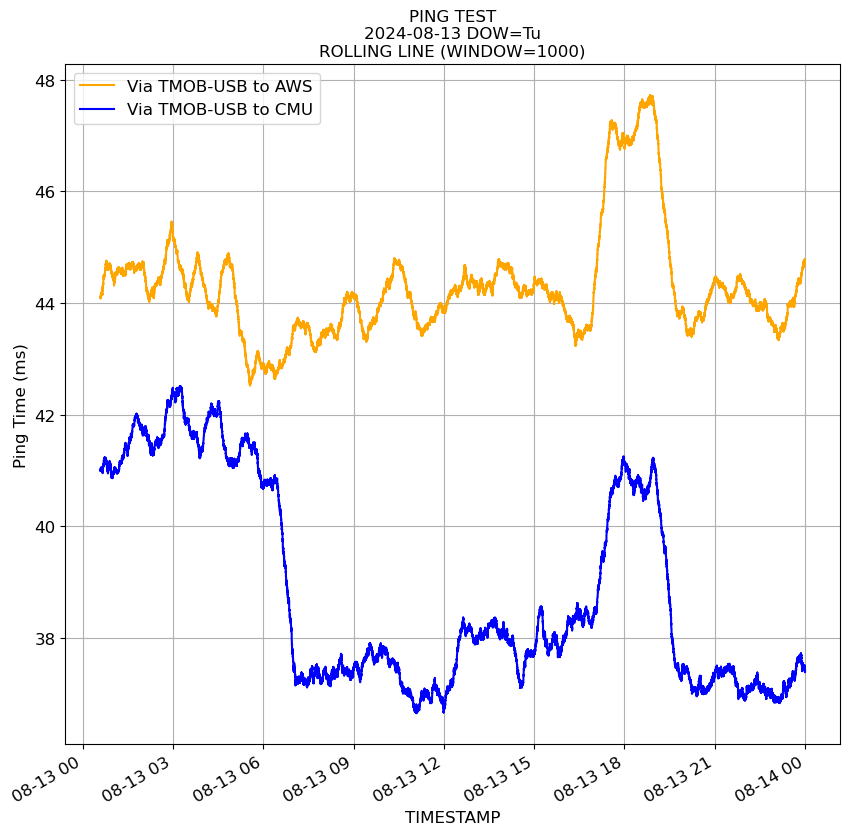

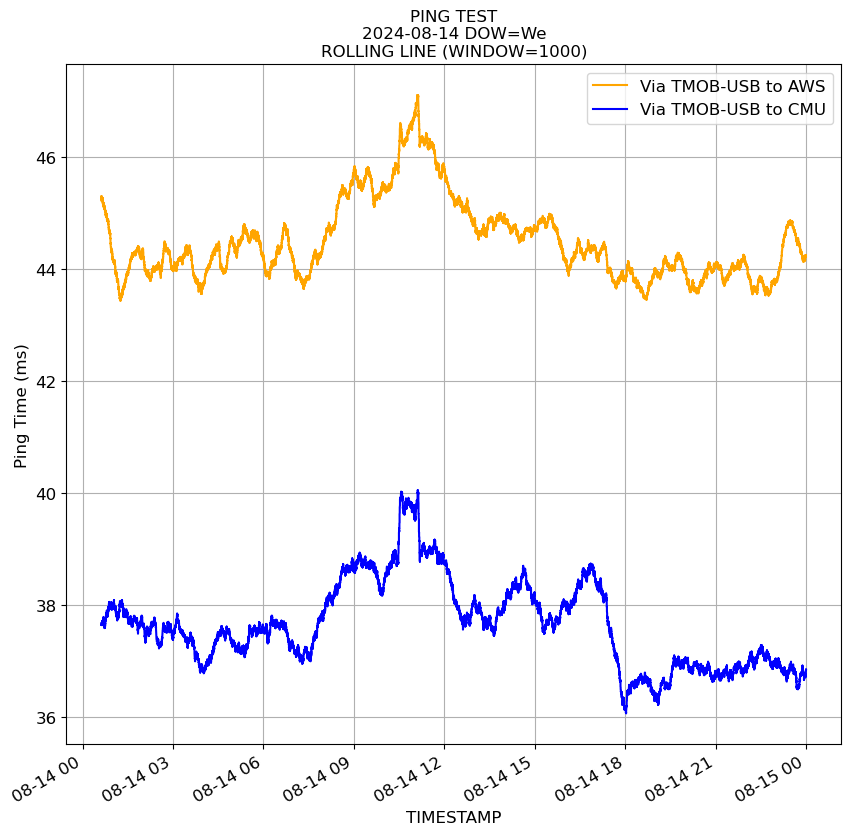

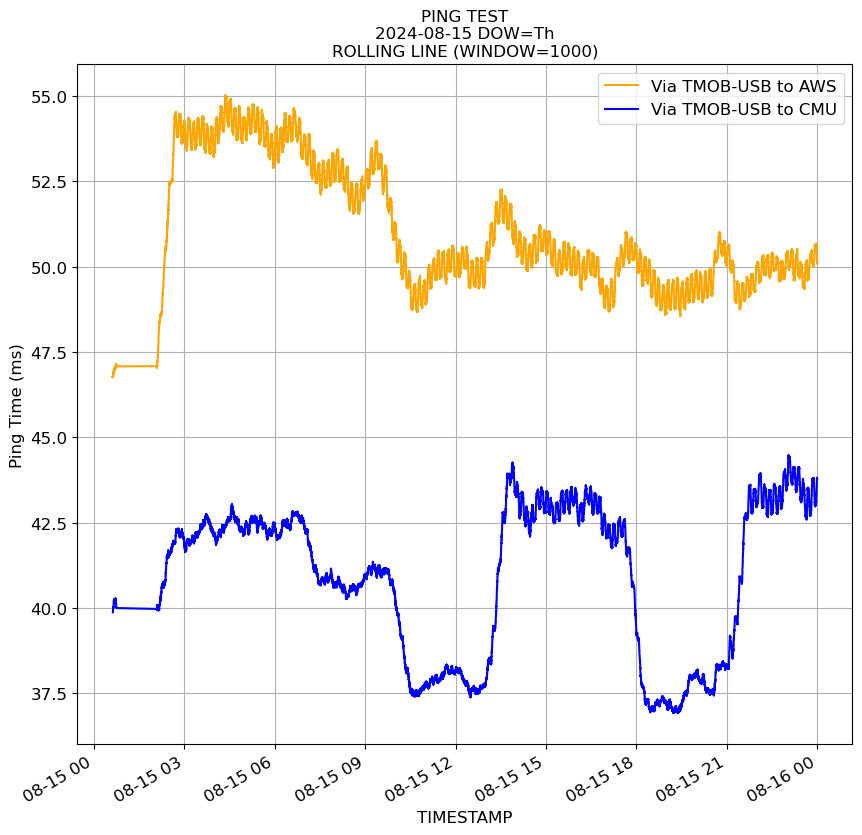

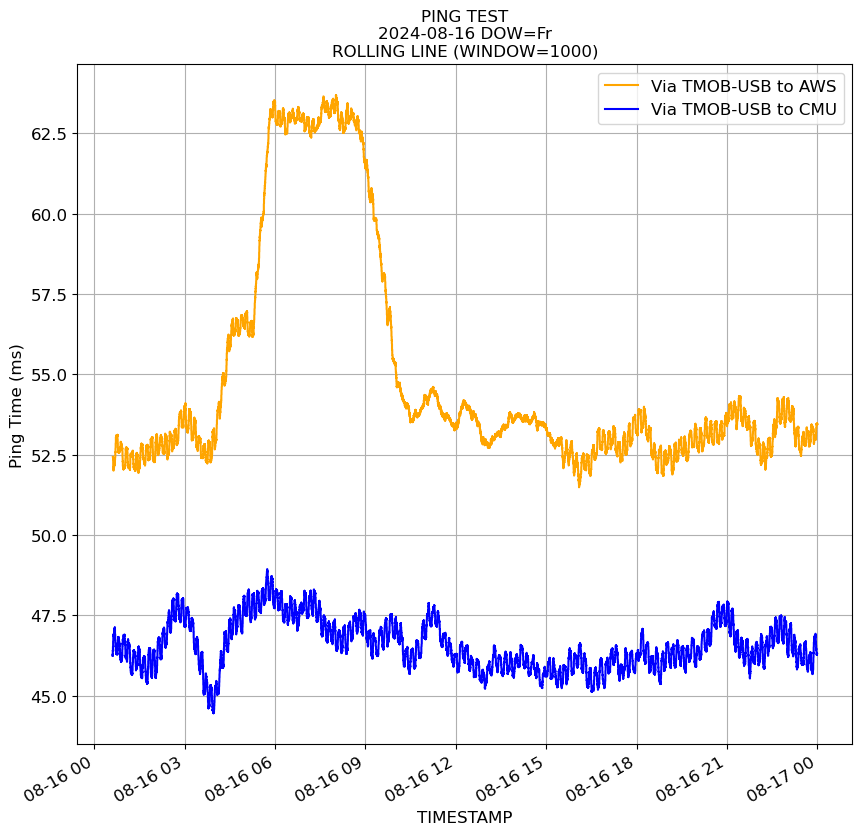

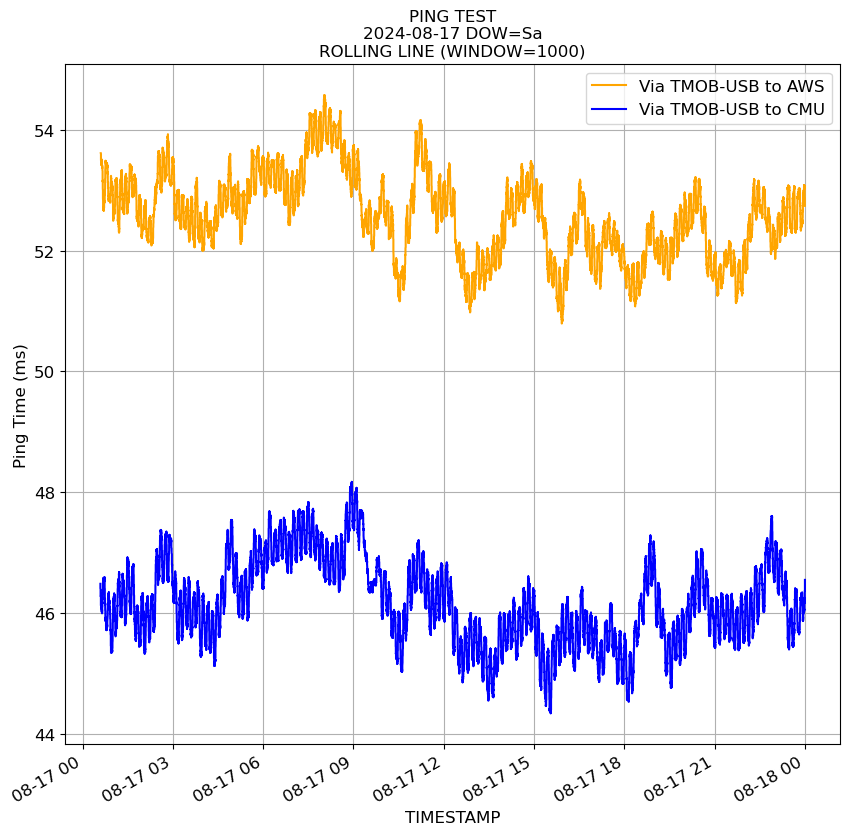

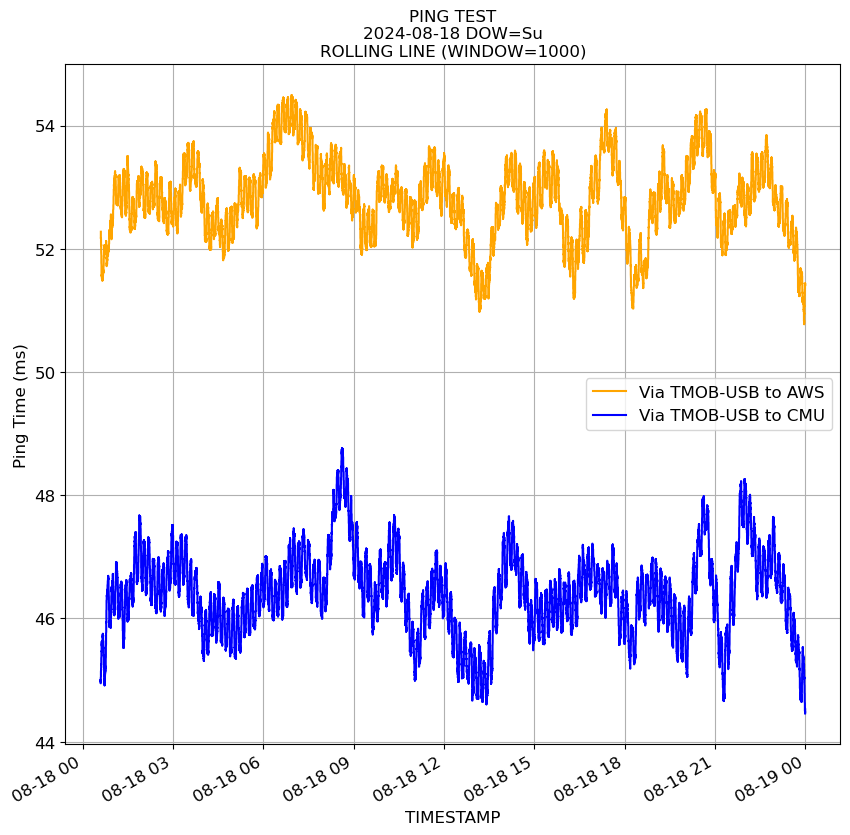

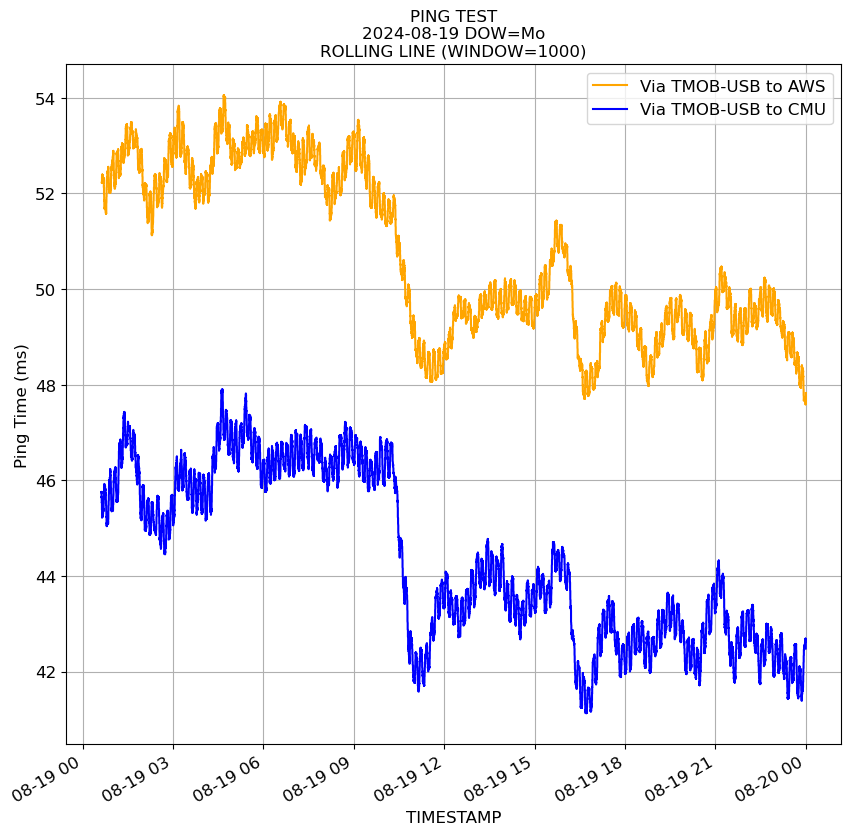

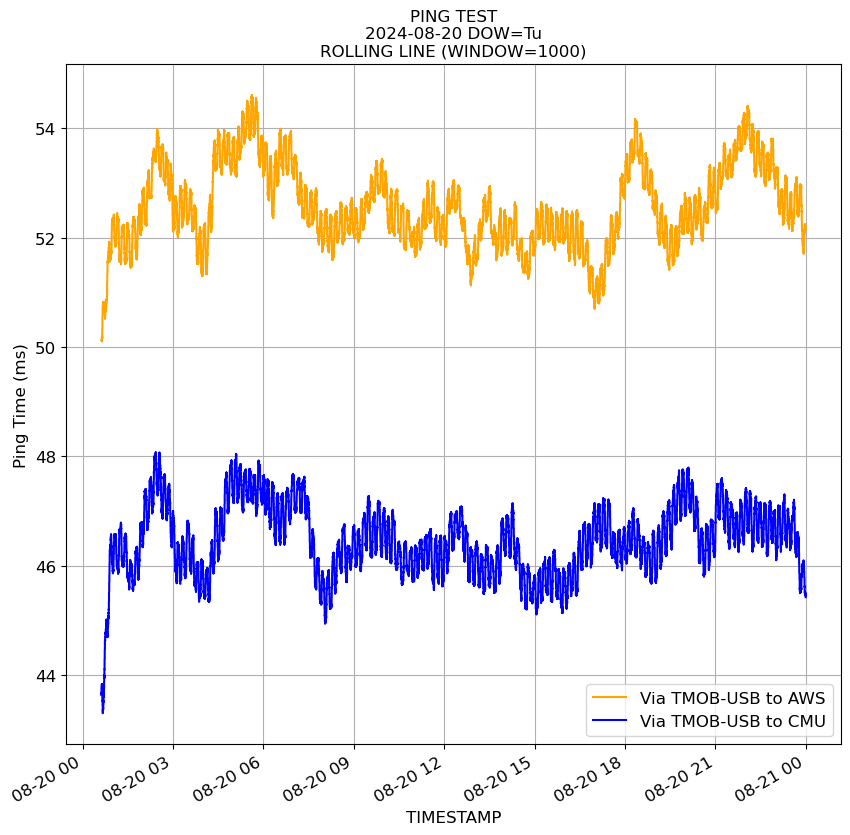

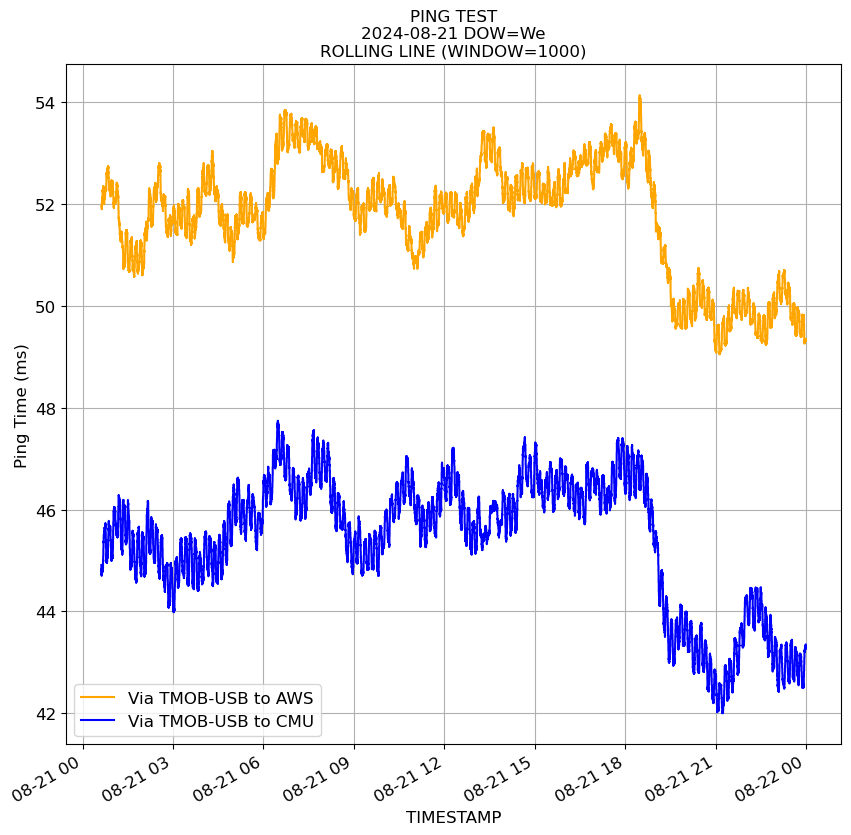

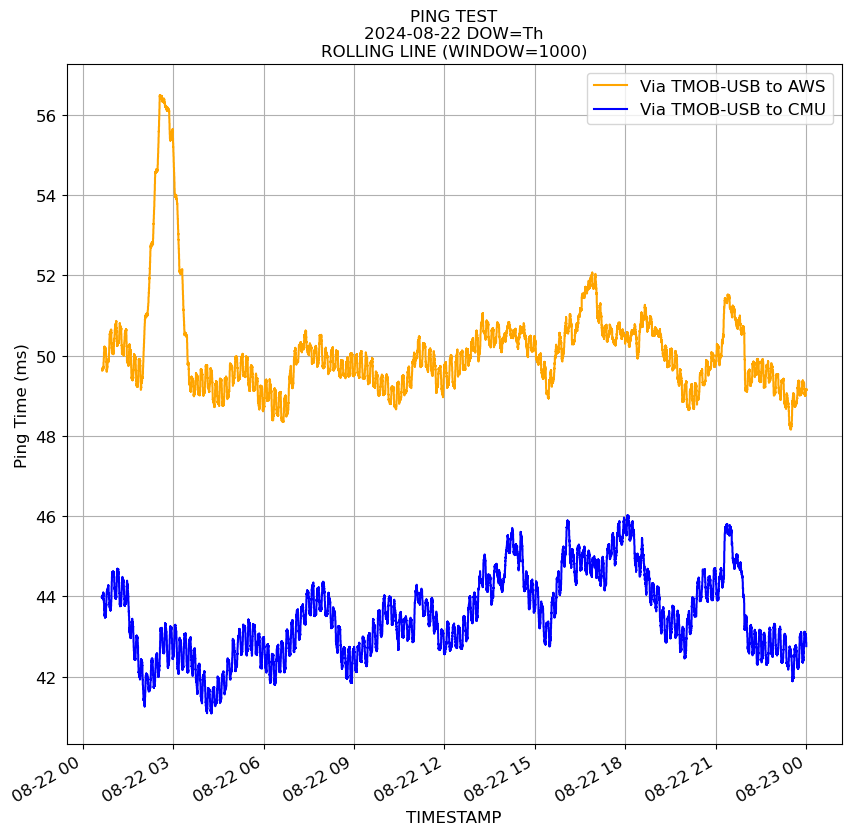

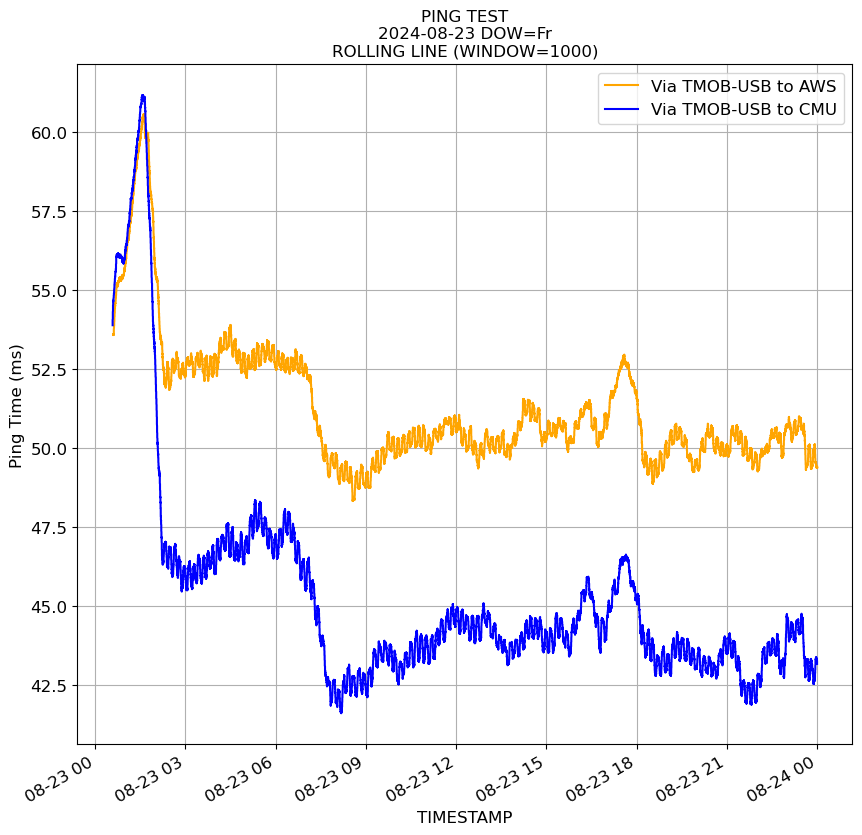

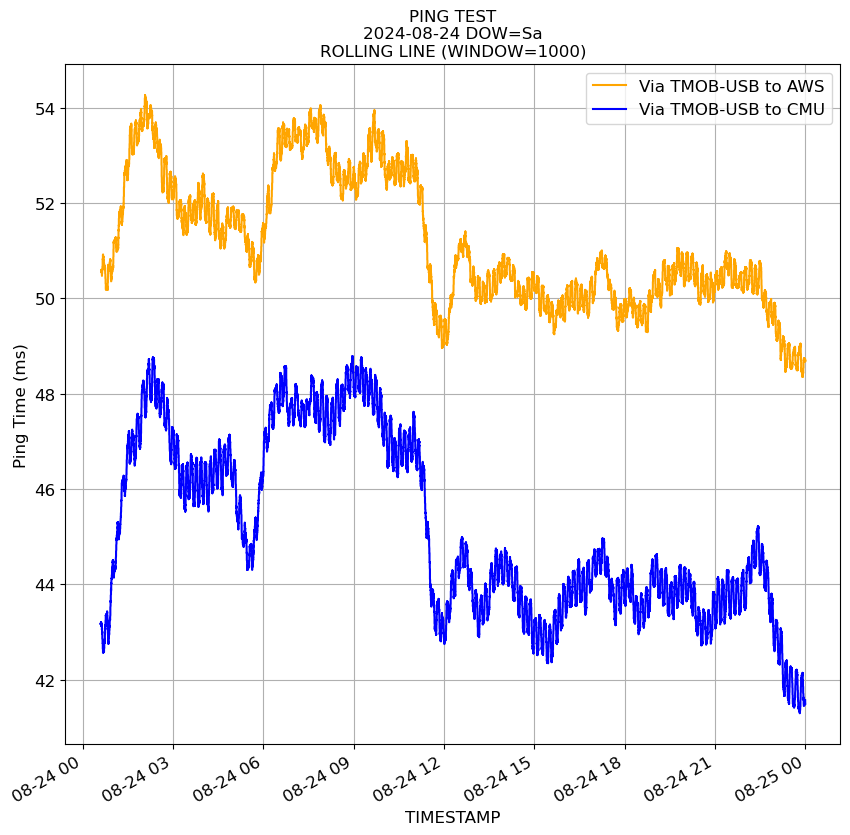

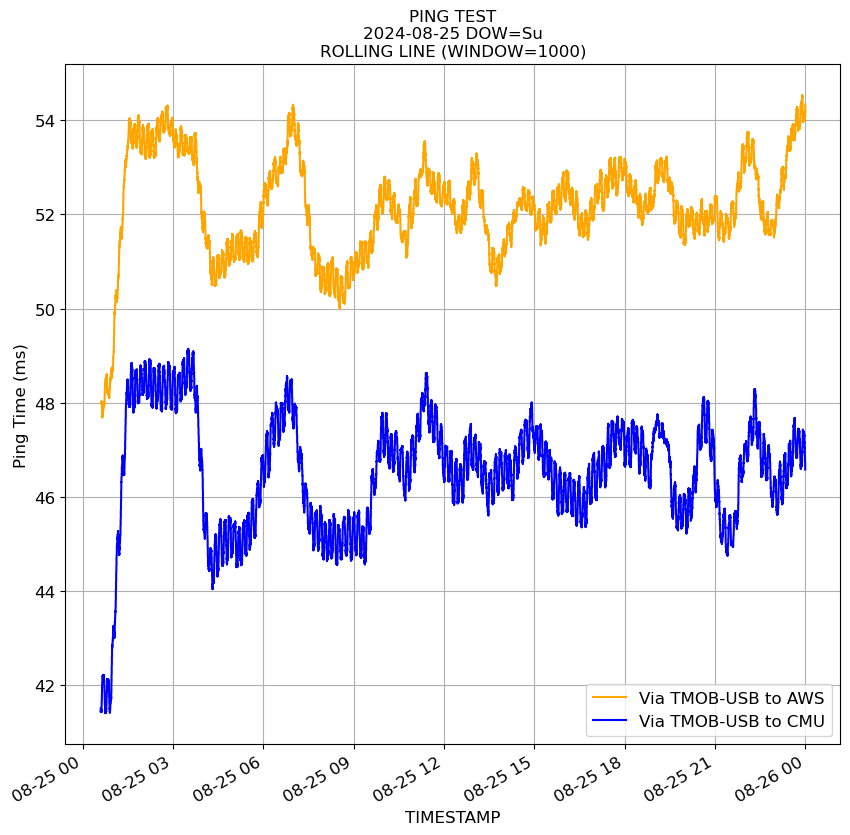

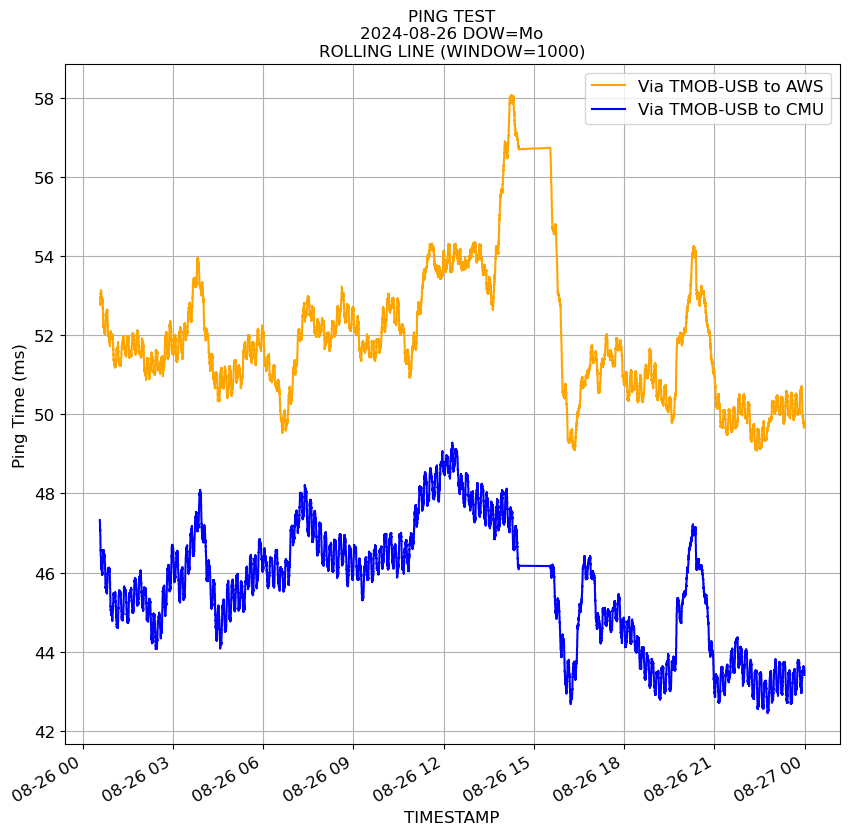

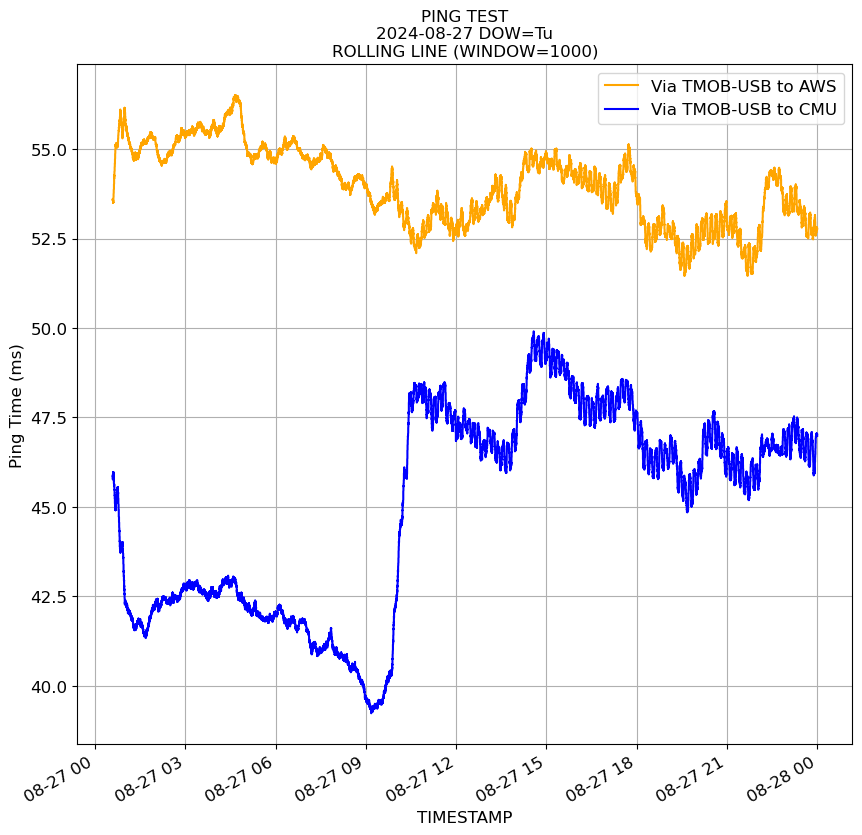

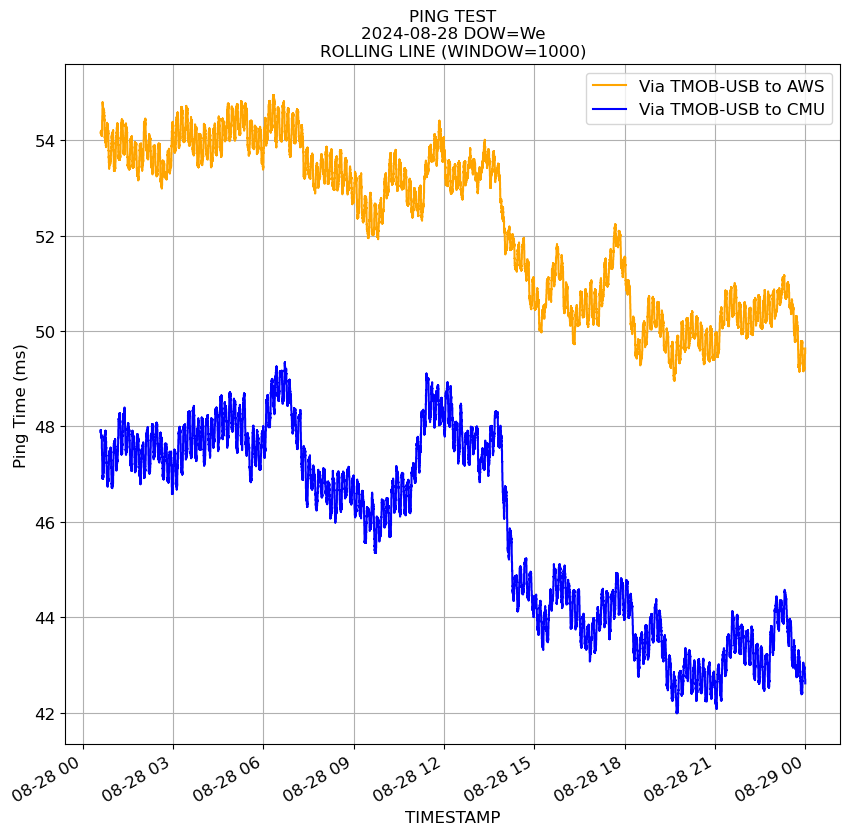

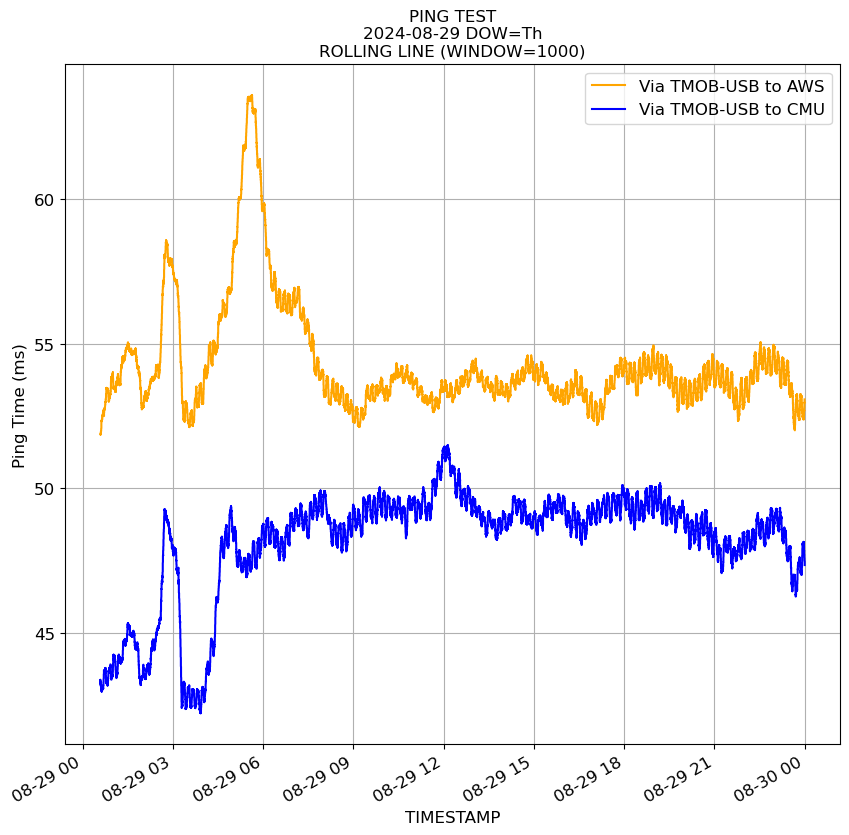

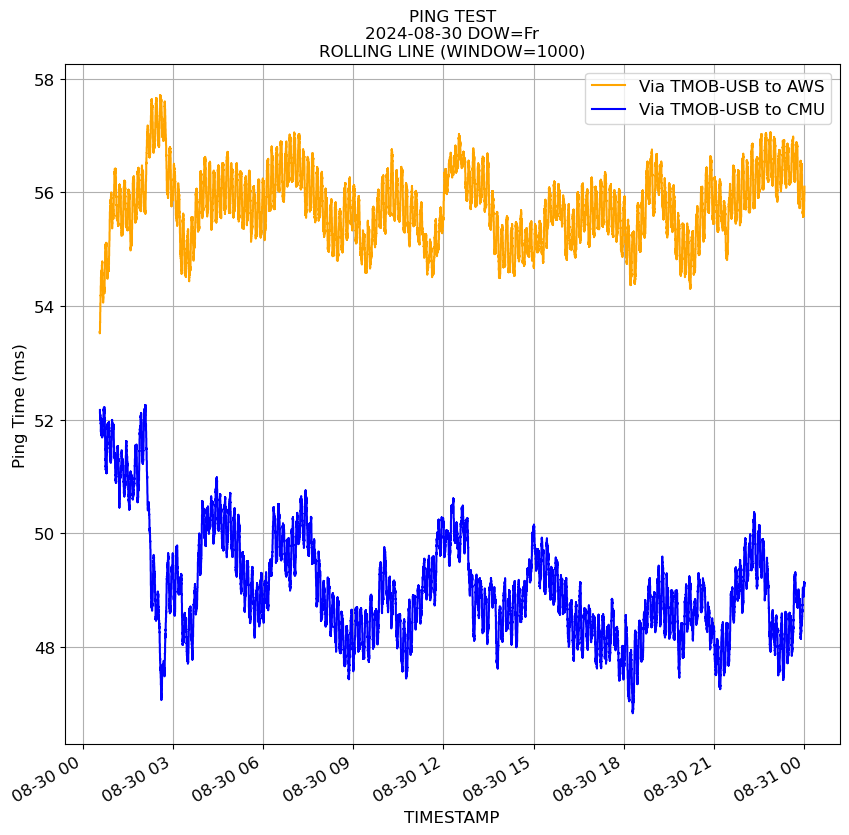

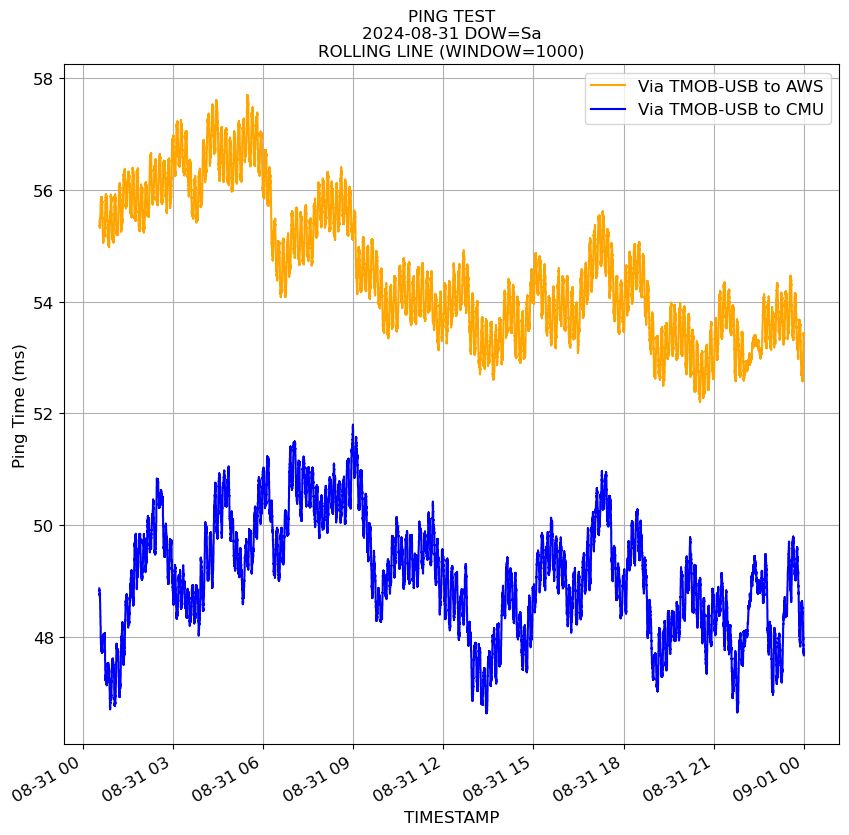

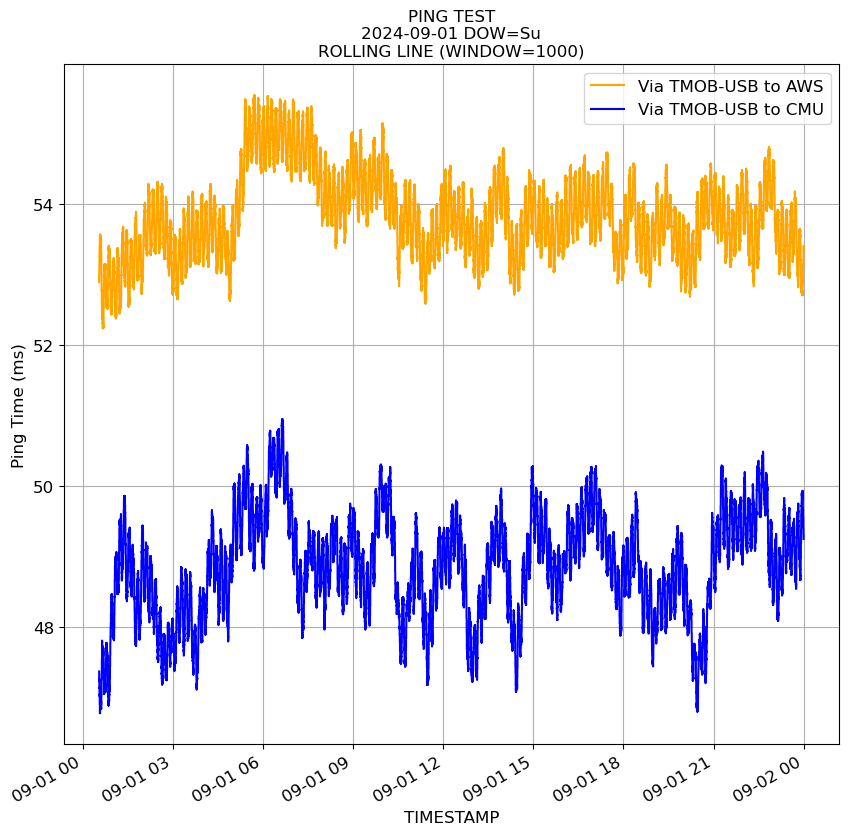

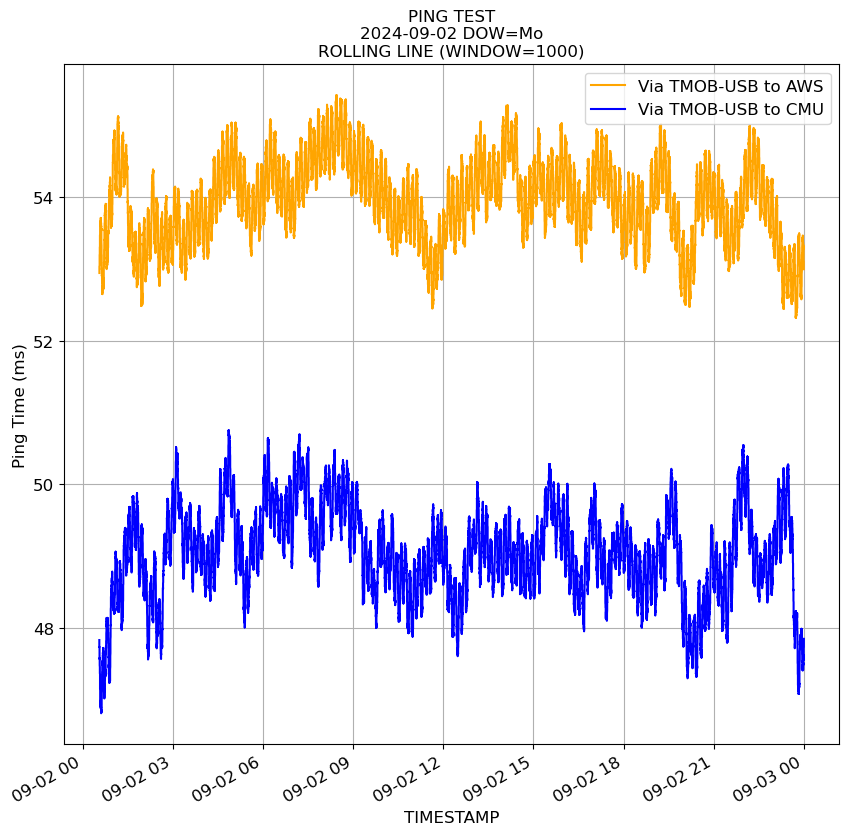

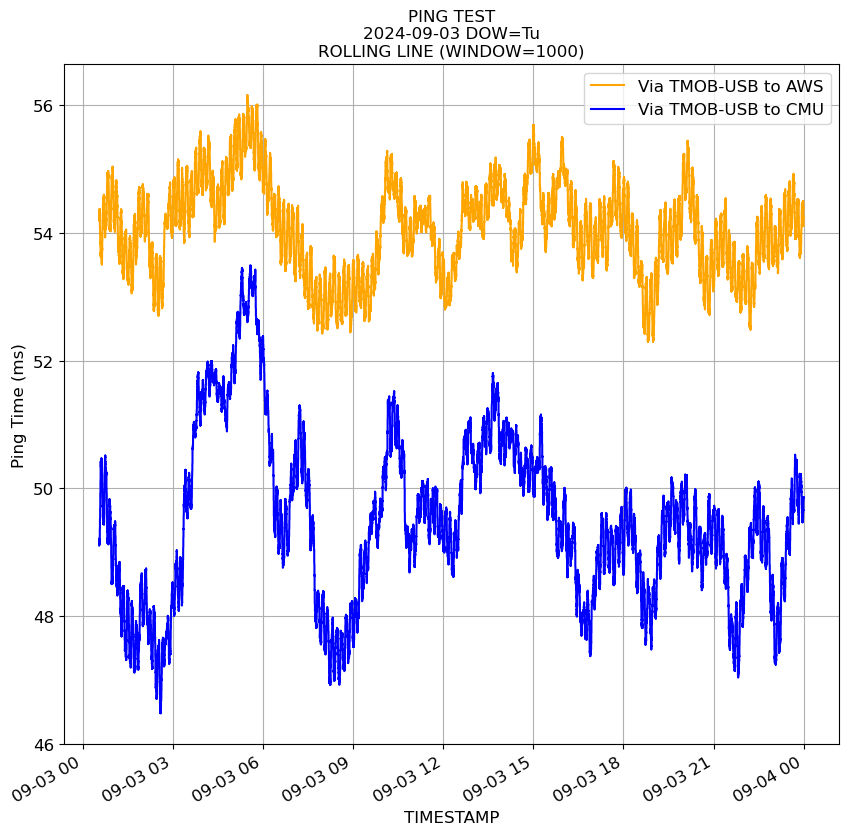

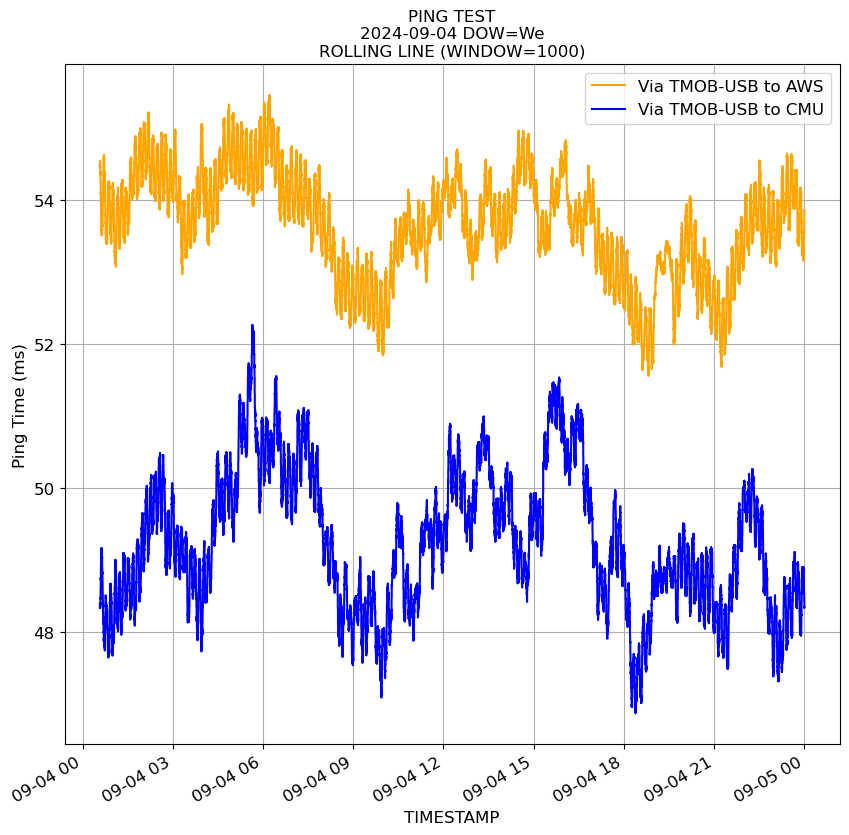

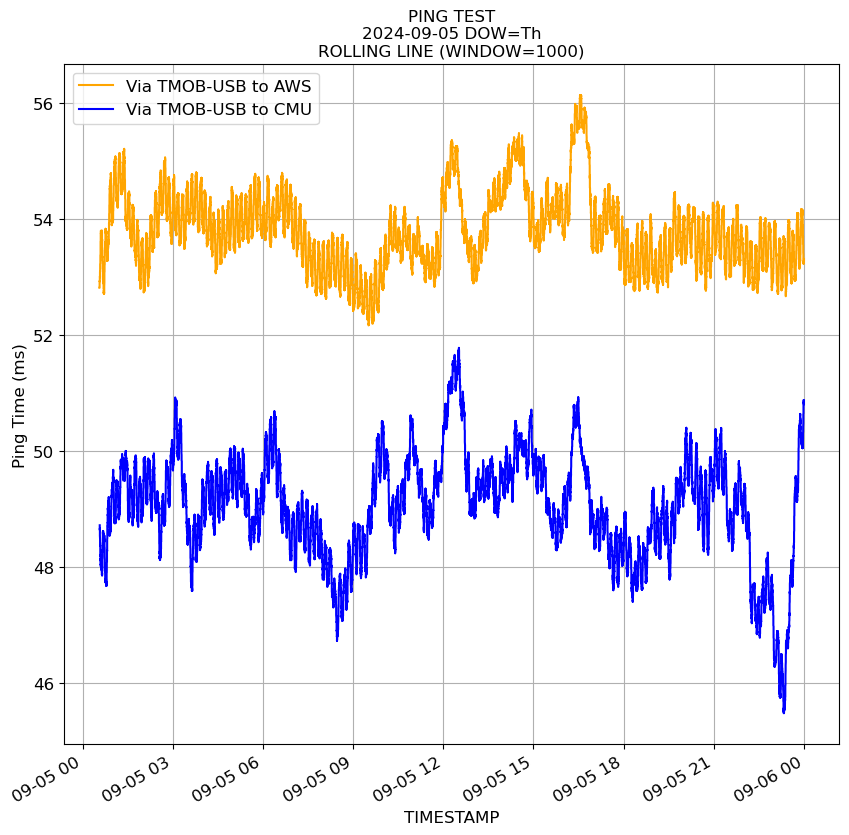

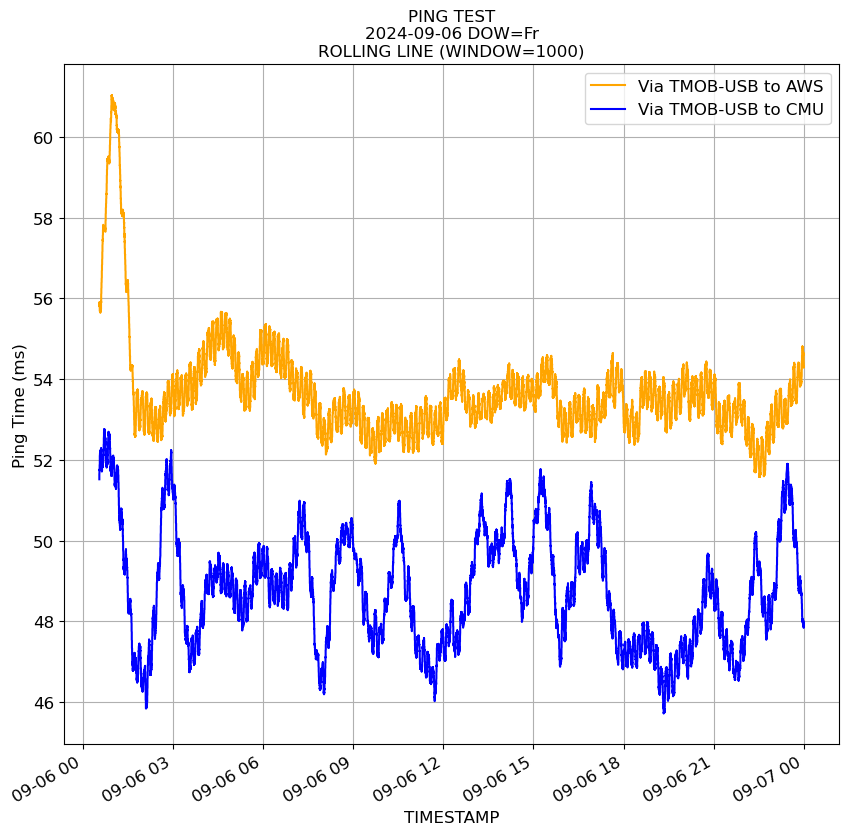

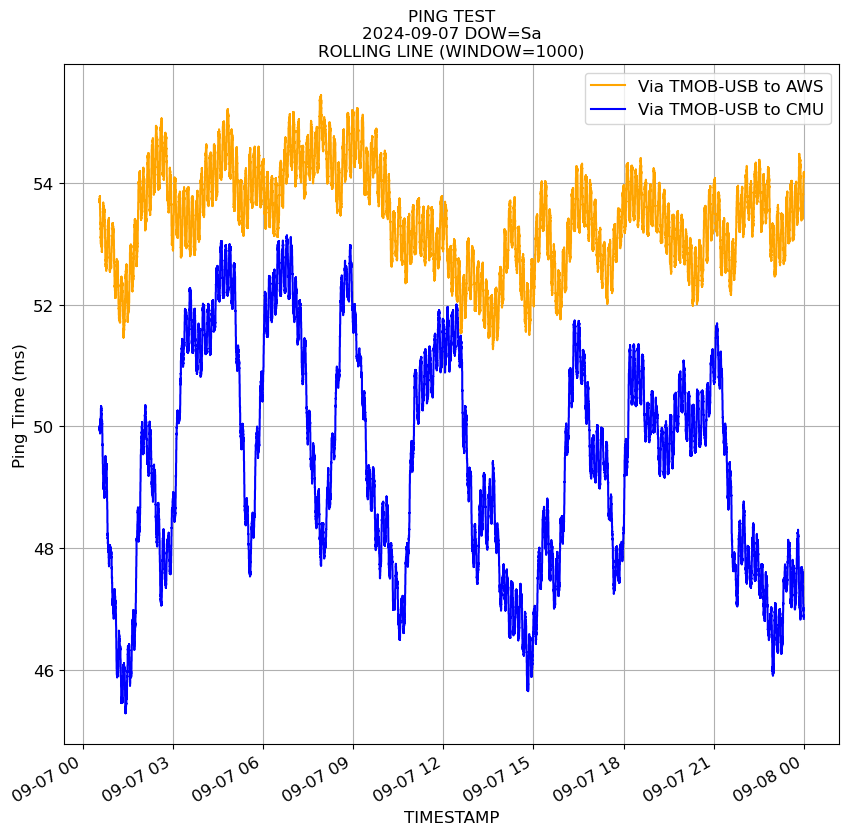

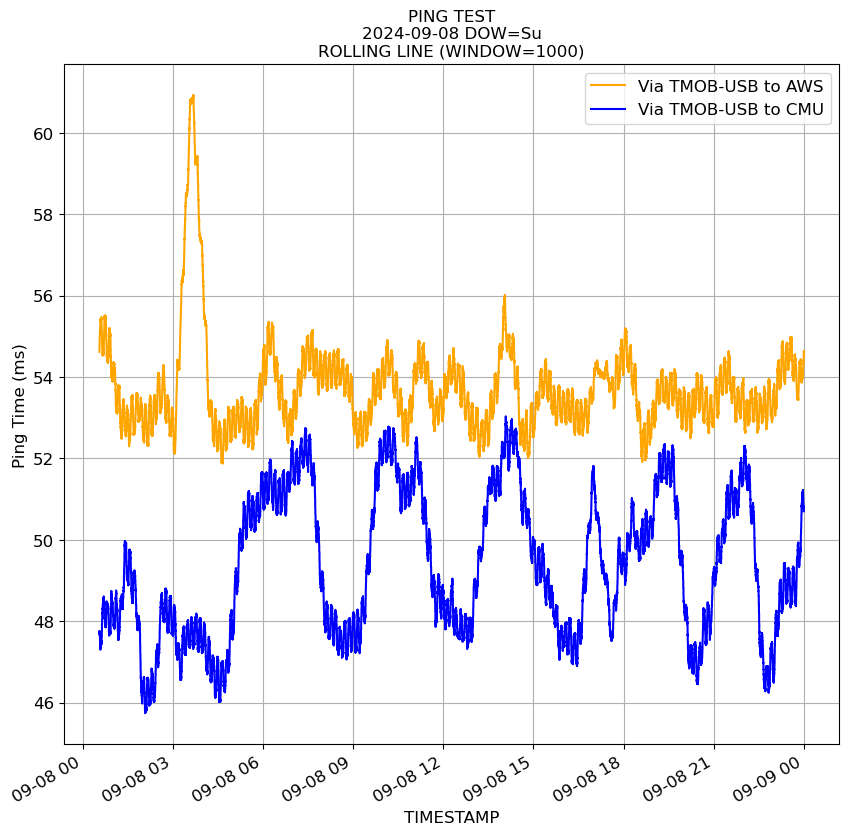

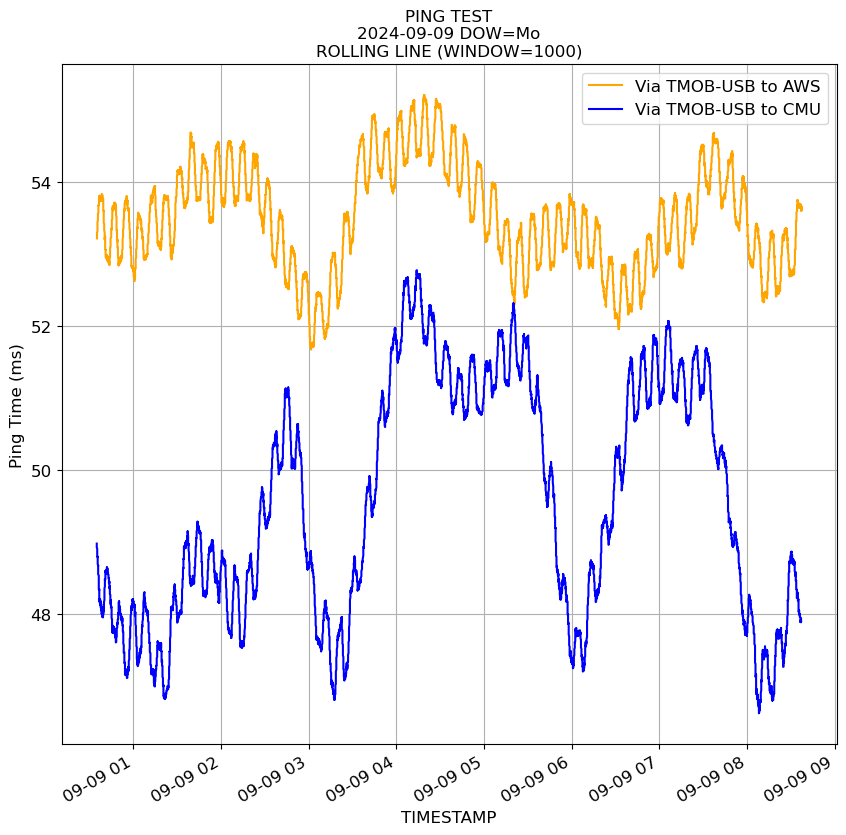

In [39]:
''' Rolling Ping Time by Day '''
WINDOW=1000
colorlst=["orange","blue","green","red","purple","c","m","y","k"]
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates().sort_values())
    sacclst = list(fdf.SACCESS.drop_duplicates().sort_values())
    pltping = 35
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for jj, SDEST in enumerate(sdestlst):
        for ii, SACCESS in enumerate(sacclst):
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            fdf1[col] = fdf1['TIME'].rolling(WINDOW).mean()
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True,color = colorlst[ii+jj])
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
            print(f"{SACCESS} to {SDEST}")
    ax.legend(labels=legendlabellst)
    ax.set_title(title,fontsize=12)
    ax.set_ylabel("Ping Time (ms)")
    savePlot(ax,filename)
    return ax
tdfz = tdfy.copy()
def plotDay(row):
    print(row.DAYFLOOR, row.DAYCEIL)
    fdf = tdfz[(tdfz.TIMESTAMP >= row.DAYFLOOR) &  (tdfz.TIMESTAMP < row.DAYCEIL)]
    print(f"fdf.shape={fdf.shape}")
    # title = f"PING TEST\n{fdf.TIMESTAMP.iloc[0].floor('1H')}\nto {fdf.TIMESTAMP.iloc[-1].ceil('1H')} \nROLLING LINE (WINDOW={WINDOW}"
    title = f"PING TEST\n{row.DAYSTR} DOW={row.SDOW}\nROLLING LINE (WINDOW={WINDOW})"
    makeLine(fdf,"ROLLINGTIME",filename=f"ROLLING PING LINE TEST {row.DAYSTR}.png",title=title)

tdfb[:].apply(plotDay,axis=1)


In [ ]:
def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png",filterdest=None,filteraccess = None):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    # ax = None
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        if filterdest is not None and filterdest != SDEST: continue
        for SACCESS in sacclst:
            if filteraccess is not None and filteraccess != SACCESS: continue
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            ax = histplot(fdf1.TIME, ax=ax, title=title, tabon=False, legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    ax.legend(labels = legendlabellst,fontsize=12)
    ax.set_title(title,fontsize = 12)
    ax.set_xlabel("Ping Time (ms)")
    savePlot(ax,filename)
    
tdfz = tdfy.copy()
makeHist(tdfz,"TIME",filename="PING HIST TEST.png",title=title + "\nHISTOGRAM")
# makeHist(tdfz,"TIME",filename="PING HIST TEST.png",title=title + "\nHISTOGRAM",filterdest = "AWS",filteraccess="TMOB")

In [ ]:
# title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
# tdfz = tdfy.copy()[['TIME','TIMESTAMP','SDEST','SACCESS']]


# tdfz = tdfz[(tdfz.SACCESS == "CBRS-5G") | (tdfz.SACCESS == "TMOB")]
# makeTable(tdfz,title=title + "\nSTATISTICS",filename="PING TEST STATS.png")

In [ ]:
''' Calculate Pings per Hour '''
tdfz = tdfy.copy()
tdfz['HOUR'] = tdfy.TIMESTAMP.dt.hour
tdfz['DOW'] = tdfy.TIMESTAMP.dt.weekday
tdfz['MONTH'] = tdfy.TIMESTAMP.dt.month
tdfz['DAY'] = tdfy.TIMESTAMP.dt.day
tdfz['TSFLOOR'] = tdfz['TIMESTAMP'].dt.floor('h')

tdfc =tdfz.groupby(['TSFLOOR','DEST'])['TIME'].count().reset_index().copy().set_index(['TSFLOOR','DEST'])
tdfc.columns = ['HOURLYCOUNT']
tdfz = tdfz.set_index(['TSFLOOR','DEST'])

tdfz = tdfz.join(tdfc).reset_index()
del tdfc
dumpdf(tdfz)

In [ ]:
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    print(sdestlst,sacclst)
    pltping = 400
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    tdfb.apply(lambda row: ax.text(row.DAYFLOOR + pd.Timedelta(hours=4),pltping, row.SDOW, style ='italic', fontsize = 10, color ="green"),axis=1)
    tdfb.apply(lambda row: ax.text(row.DAYFLOOR - pd.Timedelta(hours=3), pltping, "|", fontsize = 20, color ="green"),axis=1)
    ax.legend(labels=legendlabellst)
    ax.set_title(title,fontsize=12)
    ax.set_ylabel("Ping Count (#)")
    savePlot(ax,filename)
# dumpdf(tdfz)
title = f"PINGS PER HOUR\n{tdfz.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfz.TIMESTAMP.iloc[-1].ceil('1H')}"
makeLine(tdfz,"HOURLYCOUNT",filename="PINGCOUNT LINE TEST.png",title=title + "\nLINE")

### Periodic Iperf

#### Read in raw data

In [ ]:
def readIPerfFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['SDEST'] = fdf.DEST.map(lambda xx: cnf[xx])
    fdf['SACCESS'] = fdf.IFC.map(lambda xx: cnf[xx])
    # dumpdf(fdf)
    return fdf

# print(pingfiles)
tdfx = readIPerfFile(iperffiles[1])
dumpdf(tdfx)

In [ ]:
tdfy = pd.DataFrame()
for fn in iperffiles:
    tdfx = readIPerfFile(fn)
    tdfy = pd.concat([tdfy,tdfx])

In [ ]:
tdfy = tdfy[tdfy.TIMESTAMP > starttime].sort_values('TIMESTAMP')

title = f"IPERF TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"

In [ ]:
colname='ROLLING THROUGHPUT'
DIRECTION='UP'
# dumpdf(tdfy)
WINDOW=int(np.round(60/7*4,0))
WINDOW=100
print(WINDOW,tdfy.THROUGHPUT.min(),tdfy.THROUGHPUT.max())
tdfz = tdfy.copy()[['THROUGHPUT','TIMESTAMP','SDEST','SACCESS','DIRECTION','HDATE']]
if colname != "THROUGHPUT":
    tdfz[colname] = tdfz['THROUGHPUT'].rolling(WINDOW).mean()
tdfz['DIRECTION'] = tdfz.DIRECTION.map(lambda xx: "UP" if xx == np.nan else xx)
tdfz = tdfz[tdfz.DIRECTION == DIRECTION]

# dumpdf(tdfy)
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels=legendlabellst,fontsize=12)

    savePlot(ax,filename)
title = f"IPERF TEST {colname} {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeLine(tdfz,colname,filename=f"IPERF {DIRECTION} TEST LINE.png",title=title + "\nLINE")

def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = histplot(fdf1[col], ax=ax, title=title, tabon=False, legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels = legendlabellst,fontsize=12)
    ax.set_title(title,fontsize=12)
    savePlot(ax,filename)

title = f"IPERF TEST THROUGHPUT {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeHist(tdfz,"THROUGHPUT",filename=f"IPERF {DIRECTION} TEST HIST.png",title=title + "\nHISTOGRAM")

def makeTable(fdf,col,title="UNKNOWN",filename="tmp.png"):
    print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            fser = np.round(fdf1.THROUGHPUT.describe(),2)
            fser.name = f"{SDEST} {SACCESS}"
            dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title + " STATISTICS",fontsize=12)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
    
title = f"IPERF TEST THROUGHPUT {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeTable(tdfz,"THROUGHPUT",title=title + "\nSTATISTICS" ,filename=f"IPERF {DIRECTION} TEST STATS.png")

### Periodic Traceroute

#### Read Raw Data

In [ ]:
def readTraceRouteFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['FULLCOUNT'] = fdf.shape[0]
    # dumpdf(fdf)
    return fdf

tdfx = readTraceRouteFile(trrtfiles[0])

In [ ]:
tdfy = pd.DataFrame()
for fn in trrtfiles:
    tdfx = readTraceRouteFile(fn)
    tdfy = pd.concat([tdfy,tdfx])
tdfy['SDEST'] = tdfy.DEST.map(lambda xx: cnf[xx])
tdfy['SACCESS'] = tdfy.IFC.map(lambda xx: cnf[xx])
tdfy['NIP'] = tdfy.IP.map(ipadd2ipno)
dumpdf(tdfy)


In [ ]:
tdfy = tdfy[tdfy.TIMESTAMP > starttime].sort_values('TIMESTAMP')
title = f"TRACEROUTE TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
print(title)
dumpdf(tdfy)


In [ ]:
retcols = ['country_code','region_name','city_name','latitude','longitude']
nullser =  pd.Series([None for col in retcols],index=retcols)
nulllst = nullser.to_list()
# print(nullser)
def fetchIPdata(nip):
    tdf = idf[(idf.ip_from <= nip ) & (idf.ip_to >= nip)  & (idf.latitude != 0 ) ]
    if tdf.shape[0] == 0: return nulllst
    retlst = tdf[retcols].iloc[0].to_list()
    return retlst

tdfx = tdfy.copy()[:]
tdfx[retcols] = pd.DataFrame(tdfx.NIP.map(fetchIPdata).tolist(), index= tdfx.index)
tdfx = tdfx.dropna()
''' Mark each row with the number of GEO IP addresses in that traceroute '''
tdfx['GEOCOUNT'] = tdfx.groupby('HDATE')['HDATE'].transform('count')
dumpdf(tdfx)

In [ ]:
writejoin(tdfx.set_index('TIMESTAMP'),DATADIR2,"TRACEROUTE_SAVE.csv")

#### Read back from file

In [ ]:
tdfx = to_ts(readjoin(DATADIR2,"TRACEROUTE_SAVE.csv"))
dumpdf(tdfx)

In [ ]:
def runIPdf(fdf):
    fdf['geometry'] = pt2geom(fdf,latcol='latitude',lngcol='longitude')
    fdf['geometrynext'] = fdf['geometry'].shift(-1)
    fdf['region_name_next'] = fdf['region_name'].shift(-1)
    fdf['city_name_next'] = fdf['city_name'].shift(-1)
    fdf = fdf.dropna()
    # print(fdf.shape[0],fdf)
    tgp = df2gp(fdf.copy())
    tgp['LINEGEO'] = tgp.apply(lambda row: LineString([row['geometry'],row['geometrynext']]), axis = 1)
    # print(type(tgp))
    return tgp
tgpa = runIPdf(tdfx).reset_index(drop=True)

In [ ]:
def plotMap(fgp,title="NONE",saveon=False,filename="tmp.png"):
    tablecolumns = ['city_name','region_name','IP']
    tabdf = fgp[tablecolumns]
    plt.rcParams.update({'font.size': 12})
    # plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8, bottom=0.3, top=0.9)
    # fig.subplots_adjust(hspace=30.0)
    ax= gp_plotPoints(usagb,ax=ax, mapon=True, alpha=0)
    ax = gp_plotPoints(fgp,ax=ax, mapon=True,c='red',title=title)
    fgp = fgp[:-1] # Remove the last line -- belongs to next group
    ax = gp_plotLines(fgp,mapon=True,geocol='LINEGEO',ax=ax,color='green')
    table = ax.table(cellText=tabdf.values, colLabels=tabdf.columns,cellLoc='center', loc='bottom')
    table.scale(1,1)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    if saveon:
        savePlot(ax,filename)

''' Slice Plot '''
tgpb = tgpa.copy()
tgroup = tgpb.groupby('HDATE')
print(f"NUMBER OF TRACEROUTES: {tgroup.ngroups}")
pltstart = 0
pltlimit = pltstart + 3
for ii, (name, group) in enumerate(tgroup):
    if ii >= pltstart:
        print(ii,name)
        # dumpdf(group,head=group.shape[0])
        title = f"{group.SACCESS.iloc[0]} to {group.SDEST.iloc[0]} run={ii} allhop={group.FULLCOUNT.iloc[0]} geohops={group.GEOCOUNT.iloc[0]}\n{group.HDATE.iloc[0]}"
        filename=f"TRACEROUTE_MAP_{group.SACCESS.iloc[0]}_{group.SDEST.iloc[0]}_RUN_{ii}_{group.HDATE.iloc[0]}.png"
        plotMap(group[1:],title=title,filename=filename,saveon=True)
    if ii >= pltlimit: break
# dumpdf(tgpb)

In [ ]:
''' Filter Plot '''
saccess = "CBRS"
sdest = "AWS"
tgpb = tgpa.copy()[(tgpa.SACCESS == saccess) & (tgpa.SDEST == sdest)]
tgroup = tgpb.groupby('HDATE')
print(f"NUMBER OF TRACEROUTES: {tgroup.ngroups}")
pltstart = 24
pltlimit = pltstart + 4
for ii, (name, group) in enumerate(tgroup):
    if ii >= pltstart:
        print(ii,name)
        title = f"{group.SACCESS.iloc[0]} to {group.SDEST.iloc[0]} run={ii} allhop={group.FULLCOUNT.iloc[0]} geohops={group.GEOCOUNT.iloc[0]}\n{group.HDATE.iloc[0]}"
        filename=f"TRACEROUTE_MAP_{group.SACCESS.iloc[0]}_{group.SDEST.iloc[0]}_RUN_{ii}_{group.HDATE.iloc[0]}.png"
        plotMap(group[1:],title=title,filename=filename,saveon=True)
    if ii >= pltlimit: break
# dumpdf(tgpb)

In [ ]:
def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            print(f"{SDEST} {SACCESS}")
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = histplot(fdf1[col], ax=ax, title=title, tabon=False, legend=True,fontsize=12)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels = legendlabellst,fontsize=12)
    savePlot(ax,filename)
filename=f"TRACEROUTE_HISTOGRAM_{tdfx.HDATE.iloc[0]}_{tdfx.HDATE.iloc[-1]}.png"
dumpdf(tdfx[['SDEST','SACCESS','FULLCOUNT','HDATE']])
ax = makeHist(tdfx[['SDEST','SACCESS','FULLCOUNT','HDATE']].drop_duplicates('HDATE'),'FULLCOUNT', title=f"TRACERT FULLCOUNT RESULTS", filename="FULLCOUNT_"+filename)
# ax = makeHist(tdfx[['SDEST','SACCESS','GEOCOUNT']],'GEOCOUNT', title=f"TRACERT GEOCOUNT RESULTS",filename="GEOCOUNT_"+filename)

In [ ]:
colname = 'FULLCOUNT'
tdfy = tdfx.copy()
tdfy['PRIVATECOUNT'] = tdfy.FULLCOUNT - tdfy.GEOCOUNT
tdfy = tdfy.drop_duplicates(['HDATE',colname])

WINDOW=60
print(WINDOW,tdfy[colname].min(),tdfy[colname].max())
# dumpdf(tdfy)
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            ax = ts_lineplot(fdf1,[col], ax=ax, title=f"TRACEROUTE RESULTS {col}",legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels=legendlabellst,fontsize=12)

    # savePlot(ax,filename)

makeLine(tdfy,colname)

In [ ]:
def makeTable(fdf,title="UNKNOWN",filename="tmp.png"):
    print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            fser = np.round(fdf1.FULLCOUNT.describe(),2)
            fser.name = f"{SDEST} {SACCESS}"
            dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title,fontsize=12)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
title = f"TRACEROUTE TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
makeTable(tdfy,title=title + " STATISTICS" ,filename="TRACEROUTE TEST STATS.png")

In [ ]:
dumpdf(tdfy)